### Marketing Department

Credit card transactions for clustering: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv("Marketing_data.csv")
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Column Descriptions

| Column                   | Description                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| CUSTID                        | Unique identifier for each customer                                                          |
| BALANCE                       | Remaining balance on the customer's card                                                      |
| BALANCE_FREQUENCY             | Frequency of balance updates, scored between 0 and 1 (1 = frequent, 0 = infrequent)          |
| PURCHASES                     | Total amount spent on purchases from the account                                              |
| ONEOFFPURCHASES               | Maximum amount spent on a single purchase                                                     |
| INSTALLMENTS_PURCHASES        | Total amount spent on purchases made in installments                                           |
| CASH_ADVANCE                  | Amount of cash advanced by the user                                                            |
| PURCHASES_FREQUENCY           | Frequency of purchase transactions, scored between 0 and 1 (1 = frequent, 0 = infrequent)    |
| ONEOFF_PURCHASES_FREQUENCY    | Frequency of one-off purchases, scored between 0 and 1 (1 = frequent, 0 = infrequent)         |
| PURCHASES_INSTALLMENTS_FREQUENCY | Frequency of installment purchases, scored between 0 and 1 (1 = frequent, 0 = infrequent) |
| CASH_ADVANCE_FREQUENCY        | Frequency of cash advances being paid, also between 0 and 1                                                         |
| CASH_ADVANCE_TRX              | Number of transactions made with cash advances                                                 |
| PURCHASES_TRX                 | Number of purchase transactions made                                                          |
| CREDIT_LIMIT                  | Credit limit assigned to the card                                                              |
| PAYMENTS                      | Total amount paid by the user                                                                  |
| MINIMUM_PAYMENTS              | Minimum amount of payments made by the user                                                    |
| PRC_FULL_PAYMENT              | Percentage of the full balance paid by the user (0 never paid full payment, 1 paid credit amount in full)                                               |
| TENURE                        | Duration of credit card service for the user (in years)                                         |


#### Exploratory Data Analysis (EDA)

##### Easy Statistics

In [3]:
creditcard_df.info()
creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Getting a feel for the data;
- Mean balance is $1564
- Balance frequency is quite high. Frequently updated on average ~0.9
- Purchases average is $1000
- Cash advance on average is about $1000. Interest rates are quite high. Generally discouraged and avoided. Short term loan generally only used for urgent matters.
- Average purchases frequency us around 0.5 (quite balanced)
- One off purchases average is ~$600
    - Max is $40,761
- Average one off purchases frequency, purchases installments frequency, and cash advance frequency are generally quite low. 
    -  Not many using cash advance since so high
- Average credit limit is ~$4500
- Percentage of full payment is 15%
- Average tenure is 11

In [4]:
# Let's see who made a large one off purchase of $40761
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


- Very wealthy individual.
- They make a lot of frequent and high purchases.
- They don't use cash advance. Good to know so we don't target them for cash advance.
- They made a lot of purchases transactions. 101 when average is 14.

In [5]:
# Let's see who made a large cash advance of $47137
creditcard_df[creditcard_df["CASH_ADVANCE"] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


- This customer also has quite a high balance.
- Cash advance high 
- His cash advance frequency is also quite high, with a large number of cash advance transactions of 123.
- He does not use his purchases nearly as much - only 21 purchase transactions
- Purchase installments are low at $298
- Never paid credit card in full, neither partially (0.0 PRC_FULL_PAYMENT)

It seems like this individual relies on cash advance a lot more than most.

##### Data Visualisation

<Axes: >

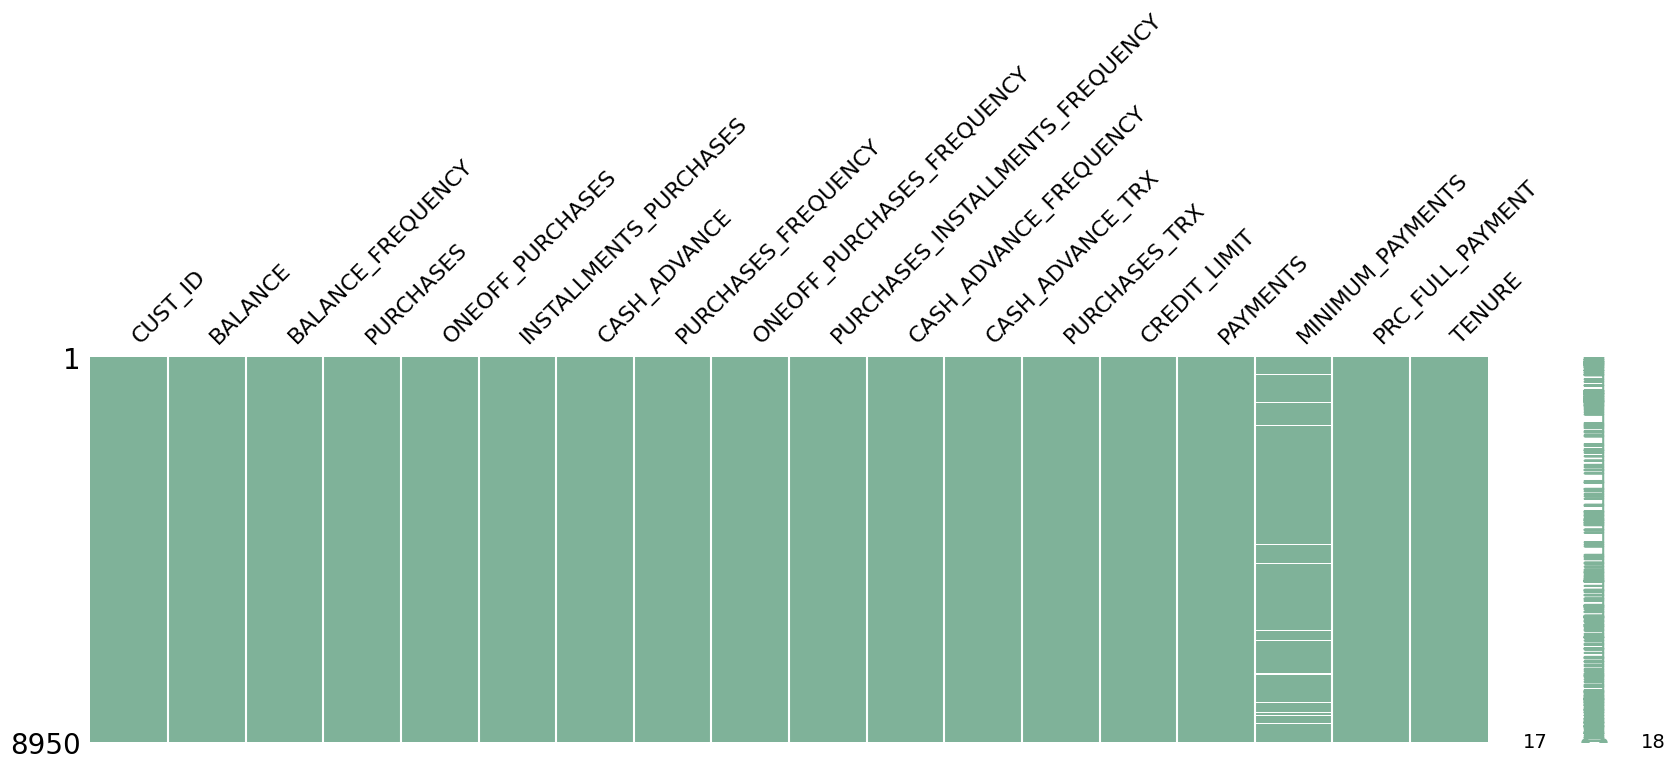

In [6]:
import missingno as msno
%matplotlib inline

msno.matrix(creditcard_df, figsize=(20,5), color=(0.5, 0.7, 0.6))

In [7]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- Only one missing for credit limit
- Minimum payments has a lot of missing values; 313 rows
- All other columns have no missing values

In [8]:
# Fill up missing values with mean of MINIMUM_PAYMENTS
creditcard_df.loc[
    creditcard_df["MINIMUM_PAYMENTS"].isnull() == True, "MINIMUM_PAYMENTS"
] = creditcard_df["MINIMUM_PAYMENTS"].mean()
creditcard_df["MINIMUM_PAYMENTS"].isnull().sum()

0

In [9]:
# Fill up the row with missing value for CREDIT_LIMIT
creditcard_df.loc[creditcard_df["CREDIT_LIMIT"].isnull() == True, "CREDIT_LIMIT"] = (
    creditcard_df["CREDIT_LIMIT"].mean()
)
creditcard_df["CREDIT_LIMIT"].isnull().sum()

0

In [10]:
# Let's see if there's any duplicate entries in data
creditcard_df.duplicated().sum()

0

In [11]:
# Let's drop Customer ID since it has no use. Customer behaviour context (like frequencies) already captured per row.
creditcard_df.drop("CUST_ID", axis=1, inplace=True)
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [12]:
n = len(creditcard_df.columns)
n

17

/tmp/ipykernel_279184/1450967636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_279184/1450967636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_279184/1450967636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

/tmp/ipykernel_279184/1450967636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_279184/1450967636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_279184/1450967636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

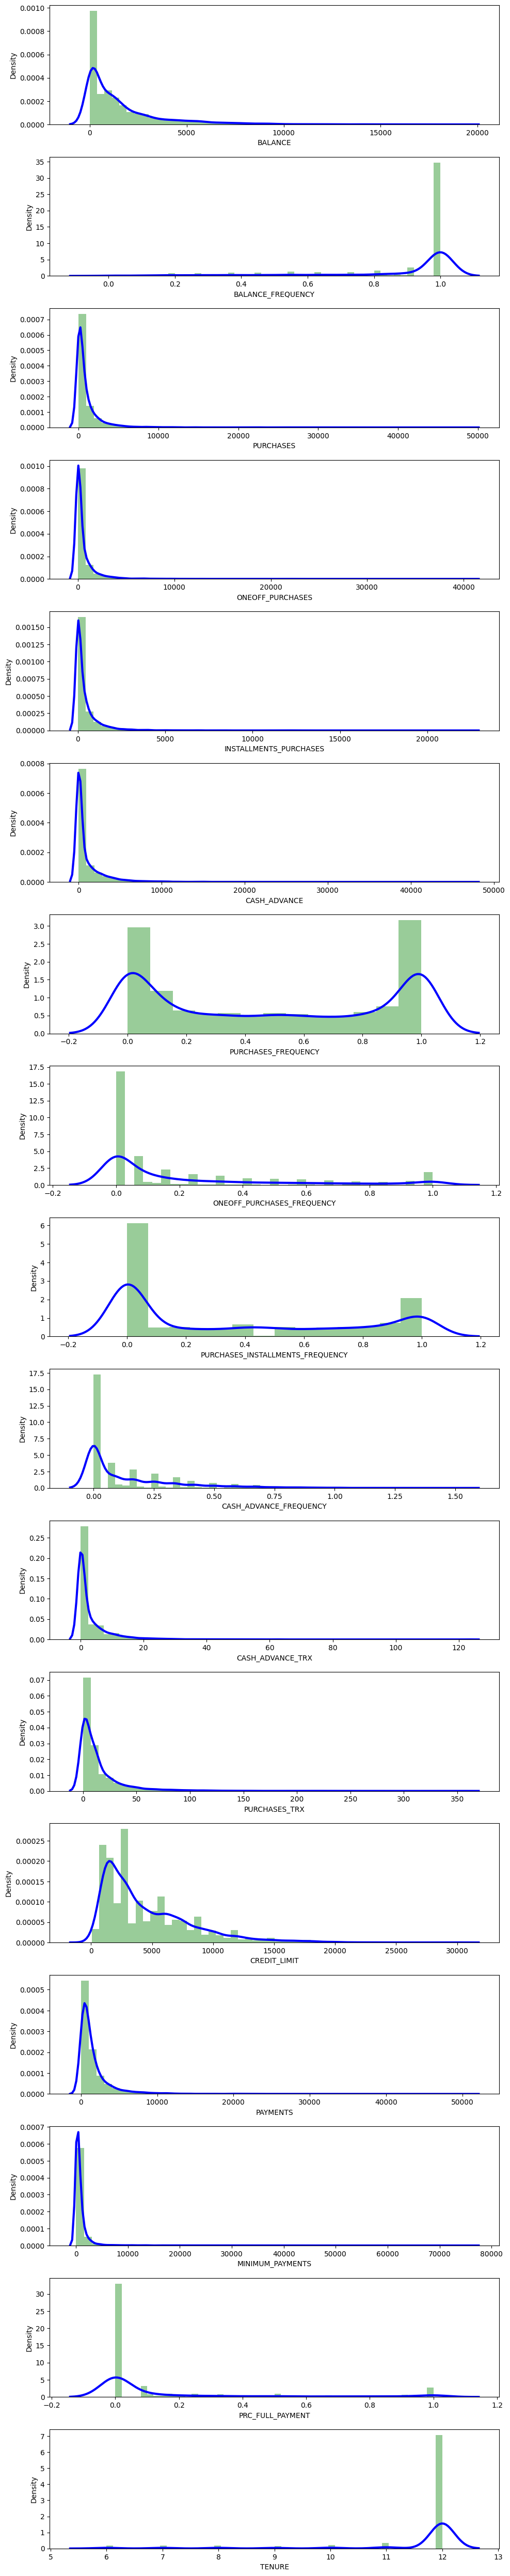

In [13]:
"""
Distplot combines the maplotlib.hist function with seaborn kdeplot()
- KDE (Kernel Density Estimation) shows the probability density for a continuous variable
"""

plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(
        creditcard_df[creditcard_df.columns[i]],
        kde_kws={"color": "b", "lw": 3, "label": "KDE"},
        hist_kws={"color": "g"},
    )
plt.tight_layout()

Highlights for distplot;
- Balance frequency is quite high. Customers update their balance often
- Purchase frequency has two distinct group of customers as indicative by U-shape in distribution;
    - Those who don't purchase frequently (close to 0)
    - And those who do (close to 1)
- Purchase installments frequency also has two distinctive groups in the same way, but with much more imbalance to customers not making purchase installments frequenty.
- Credit limit has a wide standard deviation due to variety of customers
- Unfortunately very small number of customers that pay their credit in full.
- Most customers have been with the company for 12 years. 6 years minimum which is quite high.

<Axes: >

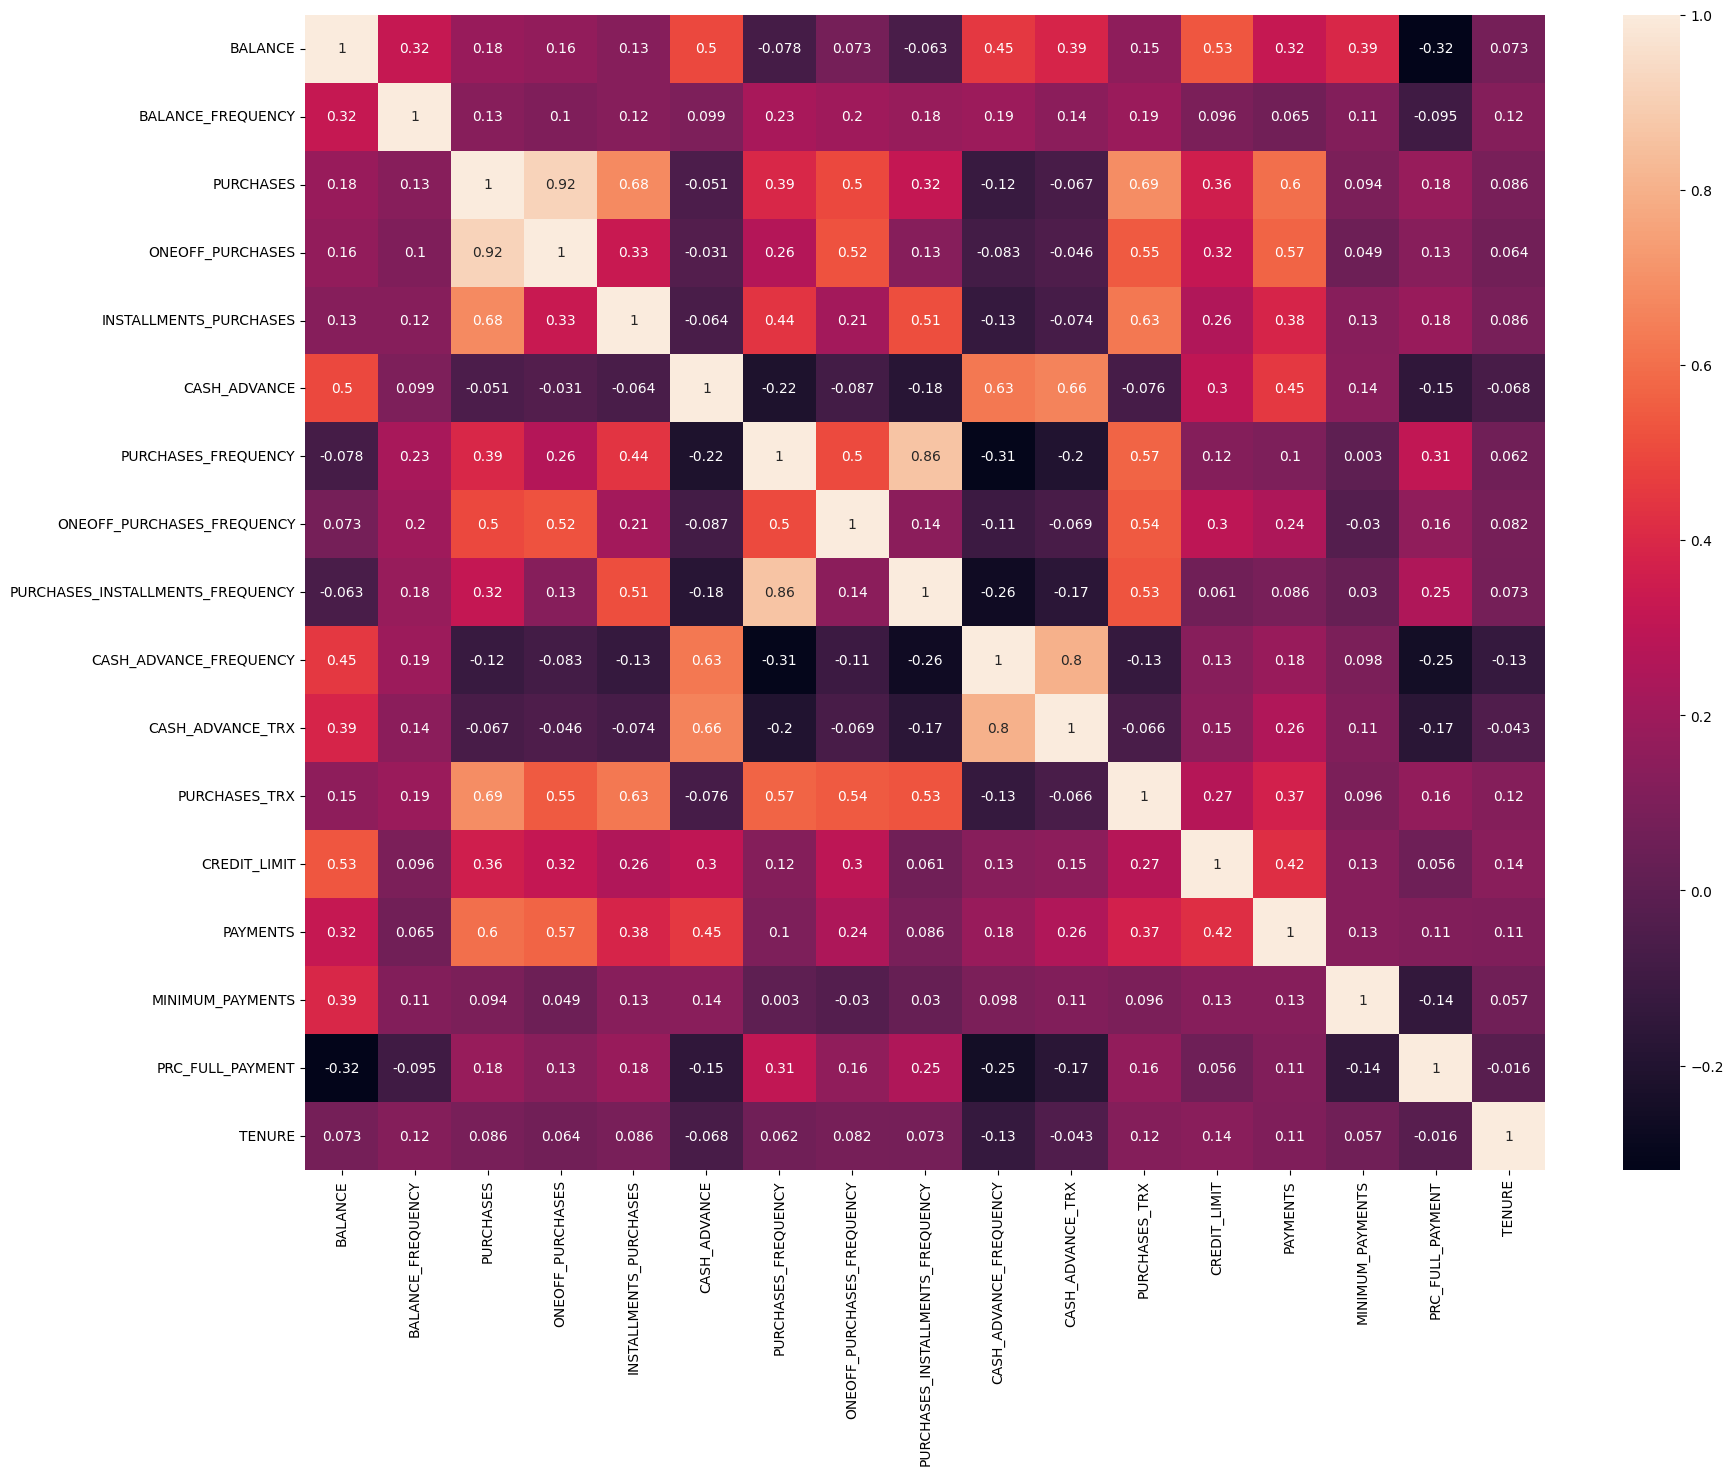

In [14]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlations, annot=True)

- Strong correlation (0.92) between oneoff_purchases and purchases. The customers who do purchases also do one off purchases (common to avoid unneccassarily high interest rates with credit)
- Strong correlation (0.86) between purchases installments frequency and purchases frequency. Makes sense
- Strong (0.8) between cash advance transactions and cash advance frequency
- Strong (0.68) between installment purchases and purchases.


#### Applying K Means

In [15]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [16]:
# And find the optimal clusters using elbow method
scores_1 = []

range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

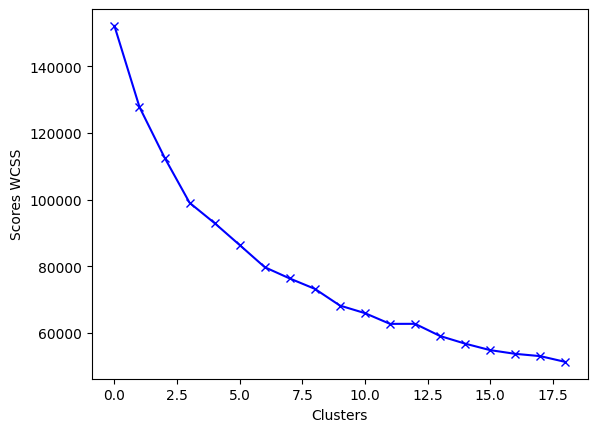

In [17]:
plt.plot(scores_1, "bx-")
plt.xlabel("Clusters")
plt.ylabel("Scores WCSS")
plt.show()

Looking at the point where the vertical distance diminishes drastically. Picking 8 number of clusters

In [18]:
# Fitting KMeans with 8 clusters
kmeans = KMeans(8, random_state=42)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

display(labels)
kmeans.cluster_centers_.shape

array([7, 3, 5, ..., 2, 7, 1], dtype=int32)

(8, 17)

In [19]:
cluster_centers = pd.DataFrame(
    data=kmeans.cluster_centers_, columns=[creditcard_df.columns]
)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.058233,0.380125,-0.008668,-0.018266,0.012715,3.443464,-0.166359,0.000556,-0.114164,2.464589,3.214804,0.038914,1.388970,2.012618,0.571945,-0.287571,0.036356
1,-0.697312,-2.143216,-0.315217,-0.234345,-0.314691,-0.311810,-0.559017,-0.424876,-0.459982,-0.483072,-0.366196,-0.425994,-0.210357,-0.226025,-0.255247,0.264202,-0.176963
2,-0.423285,0.306369,-0.059228,-0.245620,0.311194,-0.377428,1.006329,-0.378927,1.188022,-0.481567,-0.370117,0.137881,-0.332000,-0.254585,-0.127285,0.402403,-0.042480
3,0.930844,0.337142,-0.339787,-0.243746,-0.355650,0.950975,-0.732450,-0.361609,-0.635260,1.445542,0.994548,-0.430999,0.394792,0.086235,0.159508,-0.431688,-0.283473
4,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
5,0.164517,0.429473,0.940910,0.887776,0.593733,-0.297602,1.099708,1.847568,0.564352,-0.393199,-0.307858,1.198653,0.719818,0.392337,-0.040770,0.432402,0.276054
6,1.210379,0.466916,0.002326,-0.286478,0.530986,-0.040978,0.064311,-0.558459,0.305943,-0.260594,-0.091820,0.196738,-0.058635,-0.083957,10.408907,-0.525551,0.294258
7,-0.136799,0.373512,-0.320844,-0.201091,-0.389067,-0.233015,-0.739663,-0.281685,-0.722615,-0.134223,-0.197983,-0.443459,-0.397414,-0.294149,-0.092992,-0.445219,0.100819


In [20]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=creditcard_df.columns)
cluster_centers.round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5848.51,0.97,984.69,562.12,422.57,8199.98,0.42,0.20,0.32,0.63,25.19,15.68,9548.09,7559.48,2197.10,0.07,11.57
1,113.08,0.37,329.74,203.47,126.50,324.99,0.27,0.08,0.18,0.04,0.75,4.12,3729.09,1078.82,269.36,0.23,11.28
2,683.44,0.95,876.66,184.76,692.48,187.39,0.89,0.09,0.84,0.04,0.72,18.14,3286.50,996.14,567.57,0.27,11.46
3,3501.95,0.96,277.24,187.87,89.46,2973.11,0.20,0.09,0.11,0.42,10.04,4.00,5930.86,1982.79,1235.93,0.03,11.14
4,4425.36,0.97,16338.03,11188.91,5149.12,1012.53,0.92,0.77,0.77,0.08,2.51,133.69,12430.00,16098.70,2516.60,0.41,11.96
5,1906.90,0.98,3013.47,2065.96,947.97,354.79,0.93,0.75,0.59,0.06,1.15,44.50,7113.44,2868.92,769.19,0.28,11.89
6,4083.78,0.99,1008.17,116.94,891.23,892.94,0.52,0.04,0.49,0.08,2.62,19.60,4281.11,1490.10,25121.72,0.00,11.91
7,1279.74,0.97,317.72,258.67,59.24,490.23,0.19,0.12,0.08,0.11,1.90,3.69,3048.49,881.61,647.49,0.02,11.65


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [21]:
display(labels.shape)
display(labels.max())
labels.min()

(8950,)

7

0

In [22]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [23]:
# Concatenating the labels to our orginal dataframe
creditcard_df_cluster = pd.concat(
    [creditcard_df, pd.DataFrame({"cluster": labels})], axis=1
)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


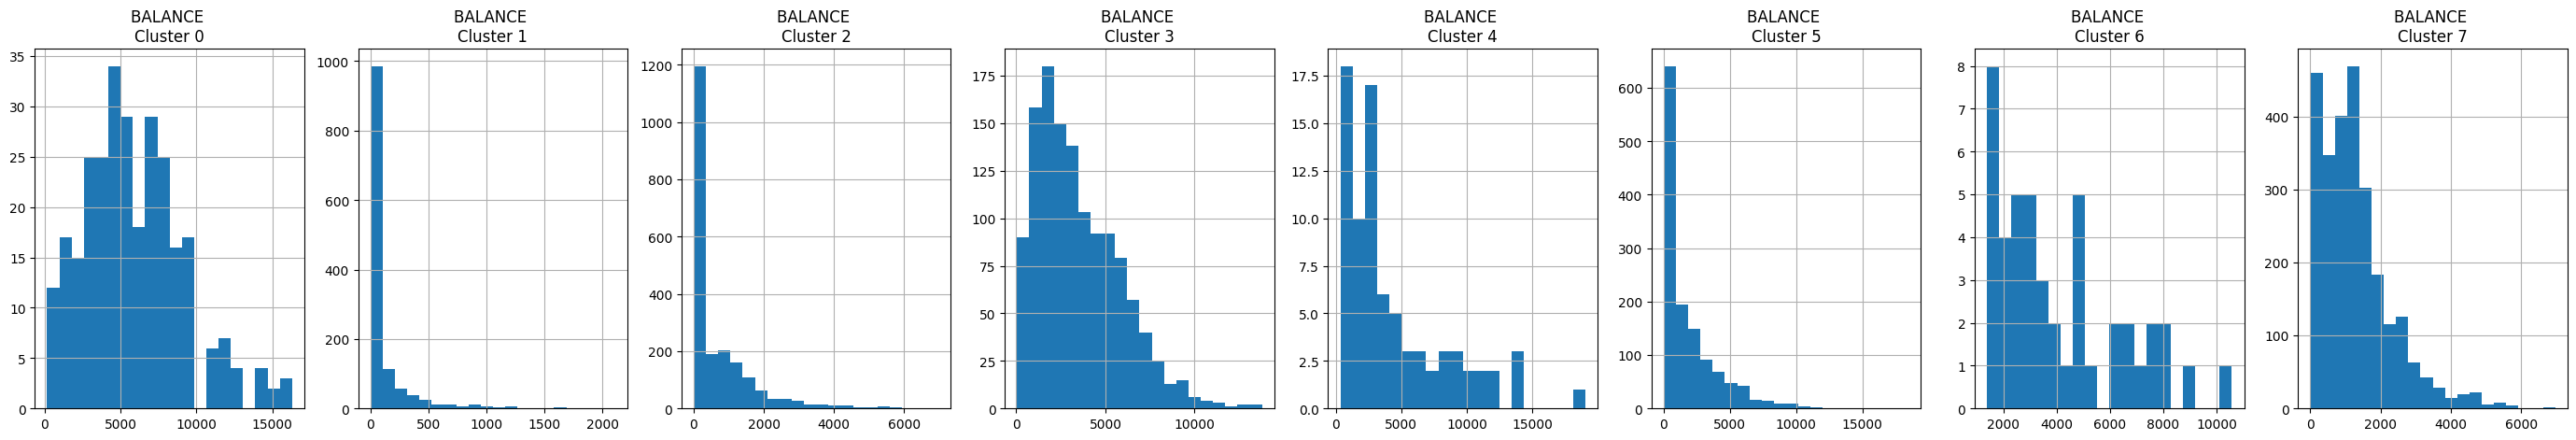

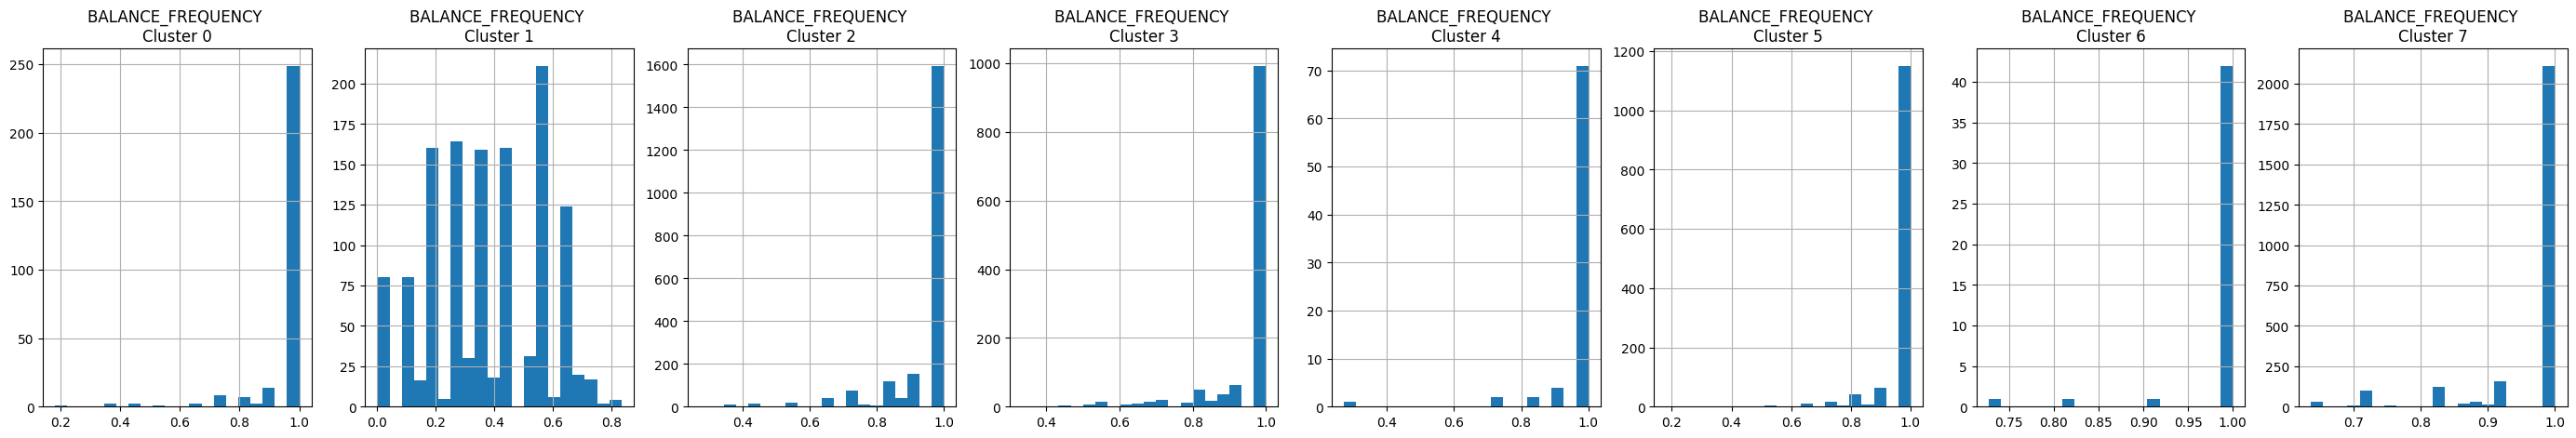

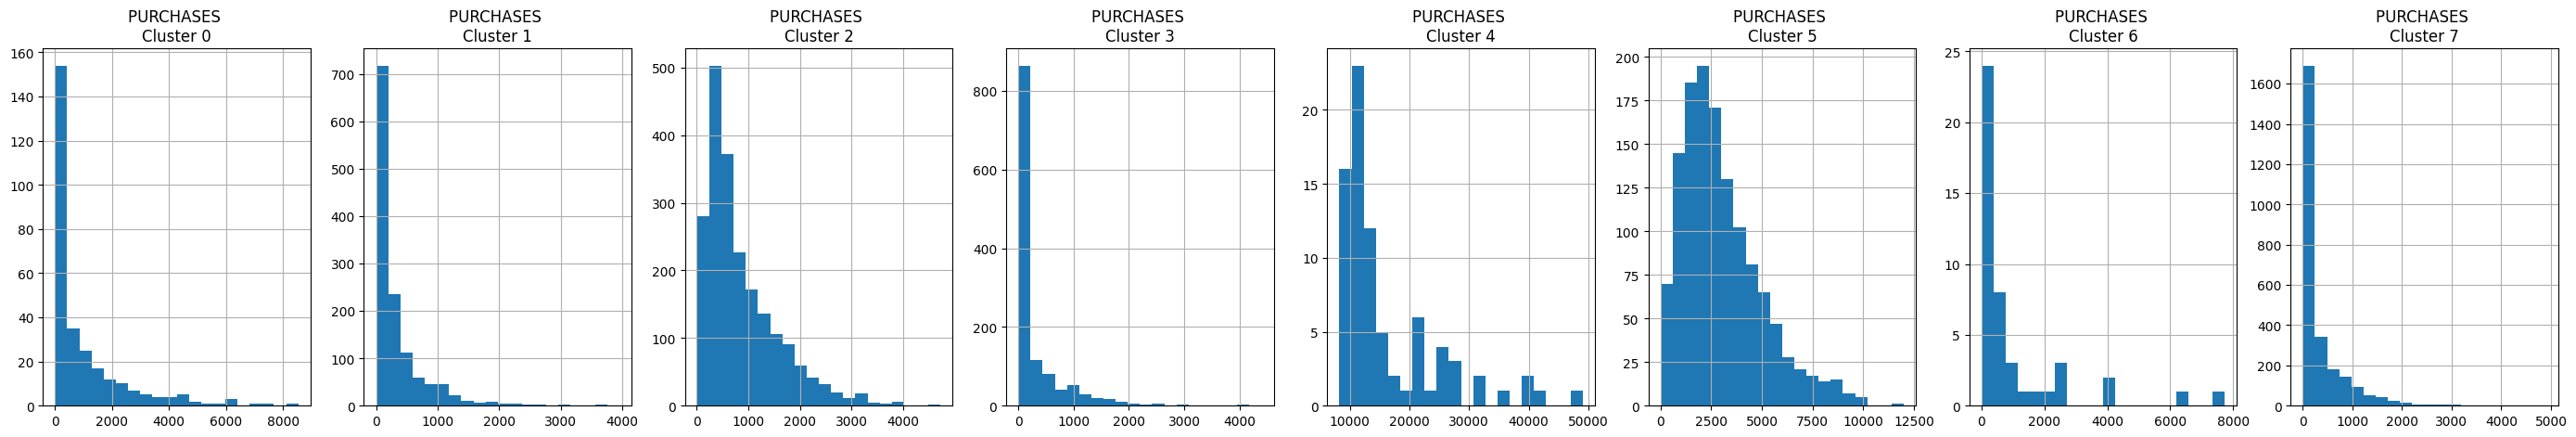

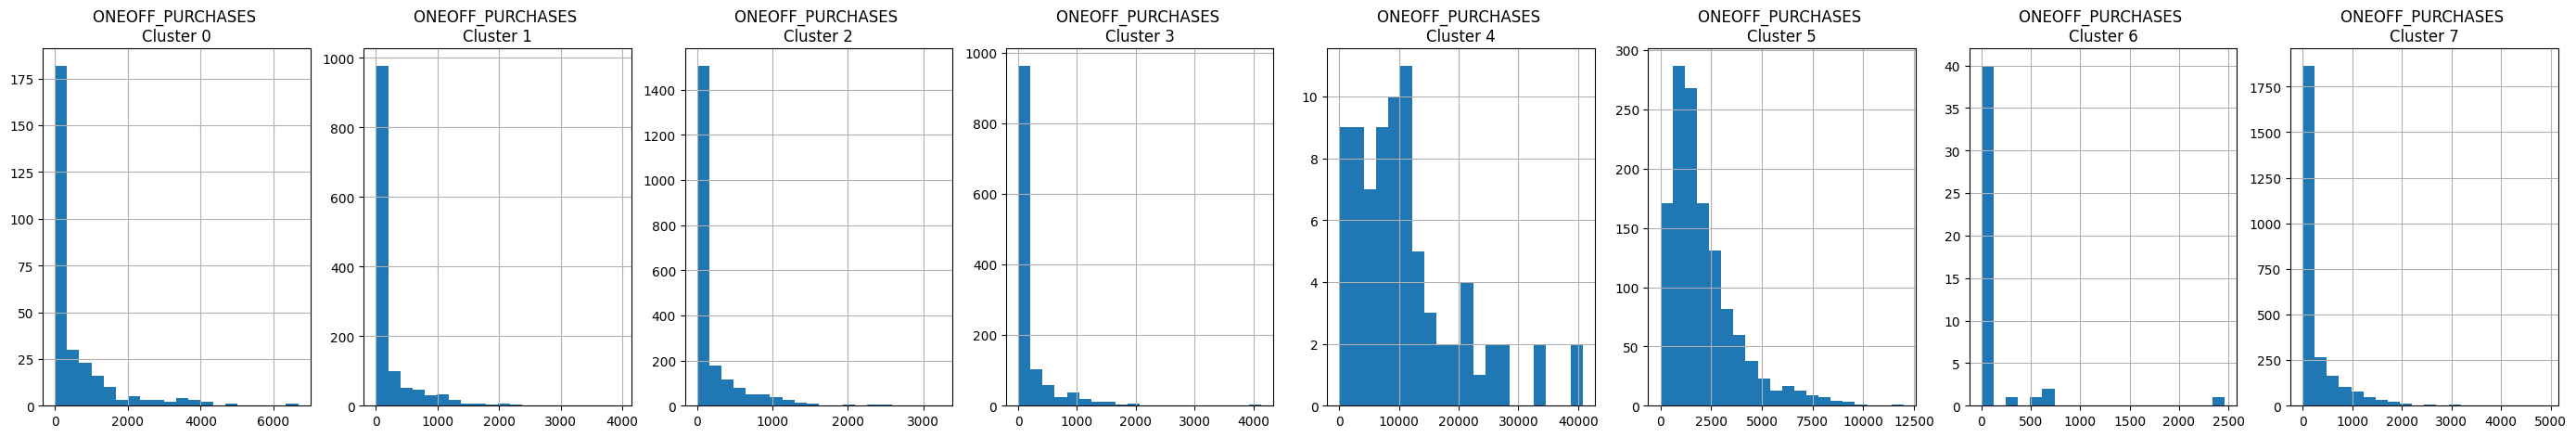

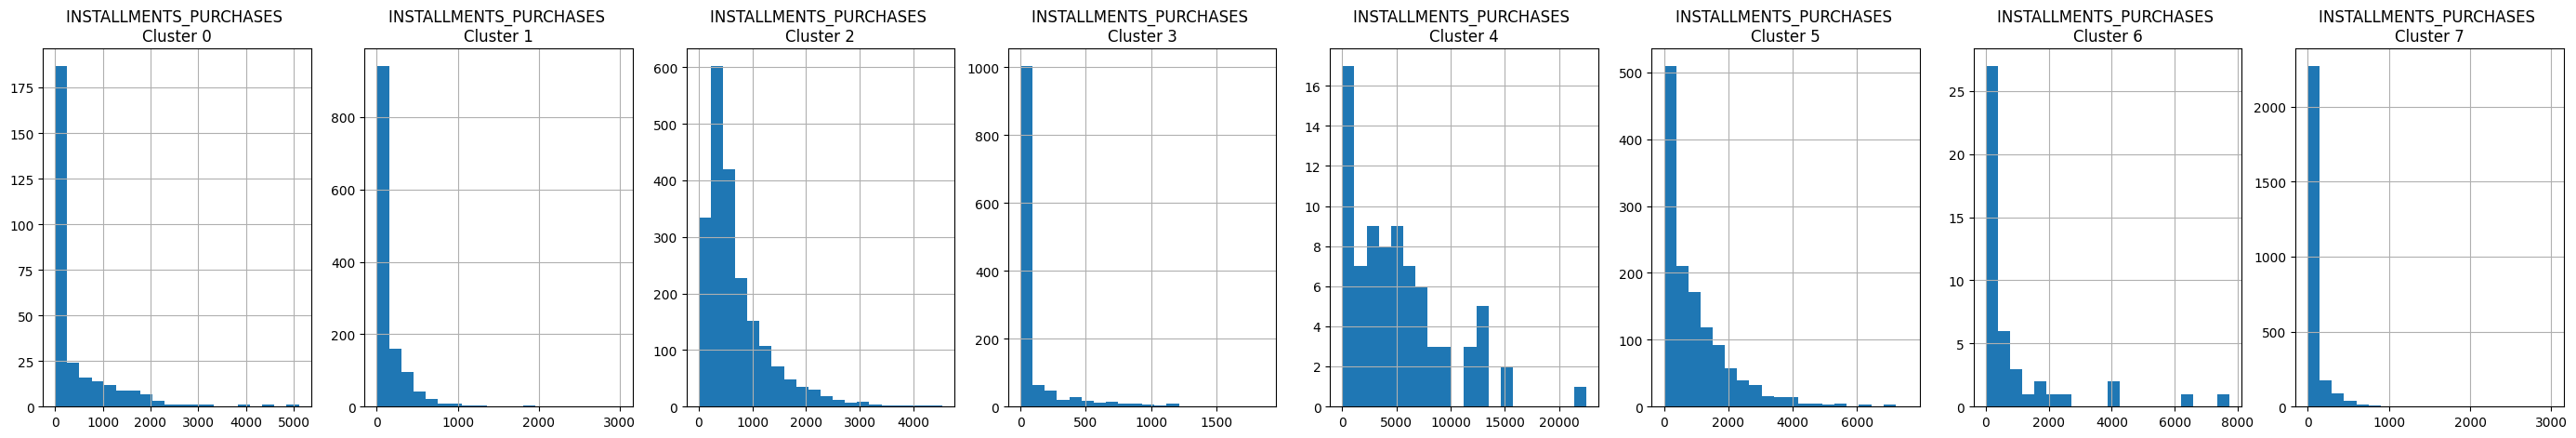

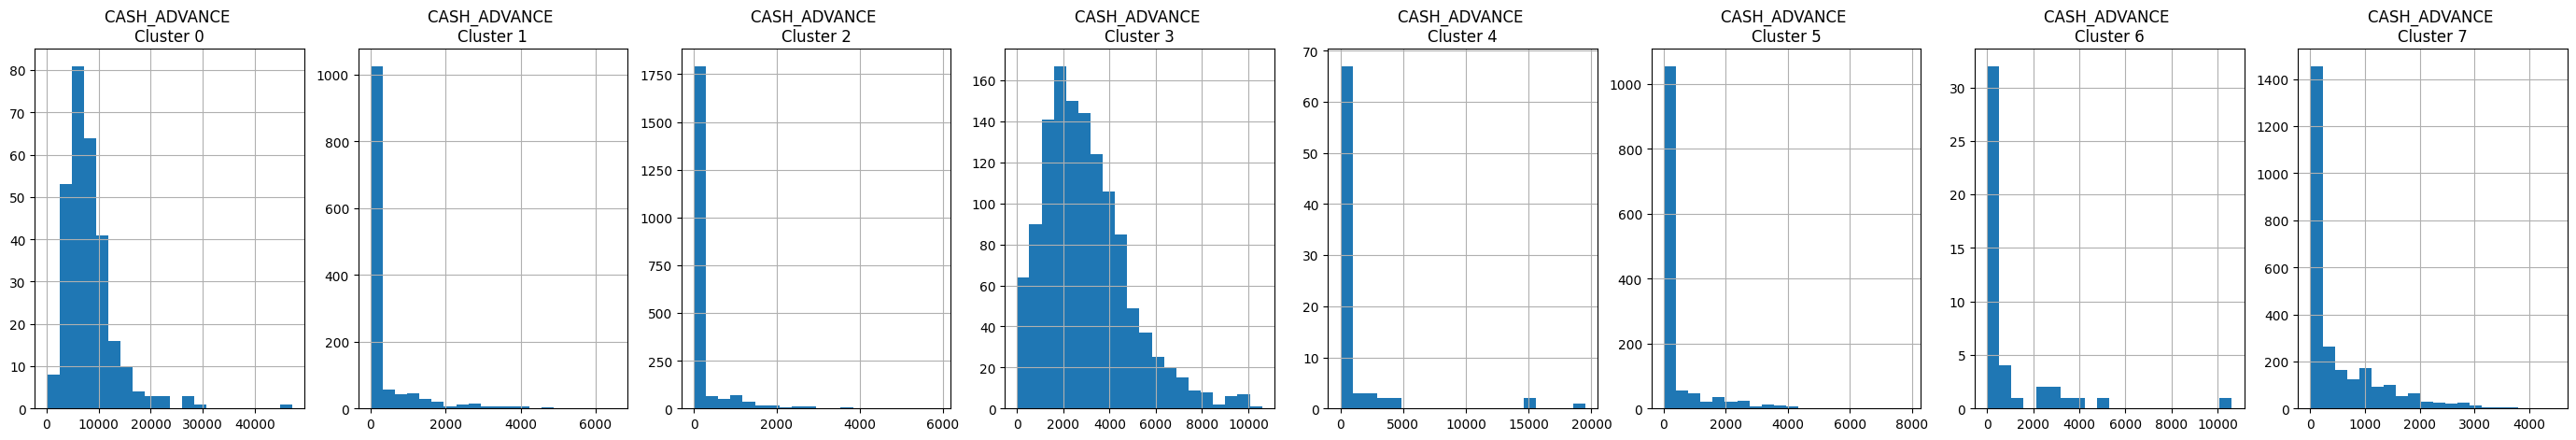

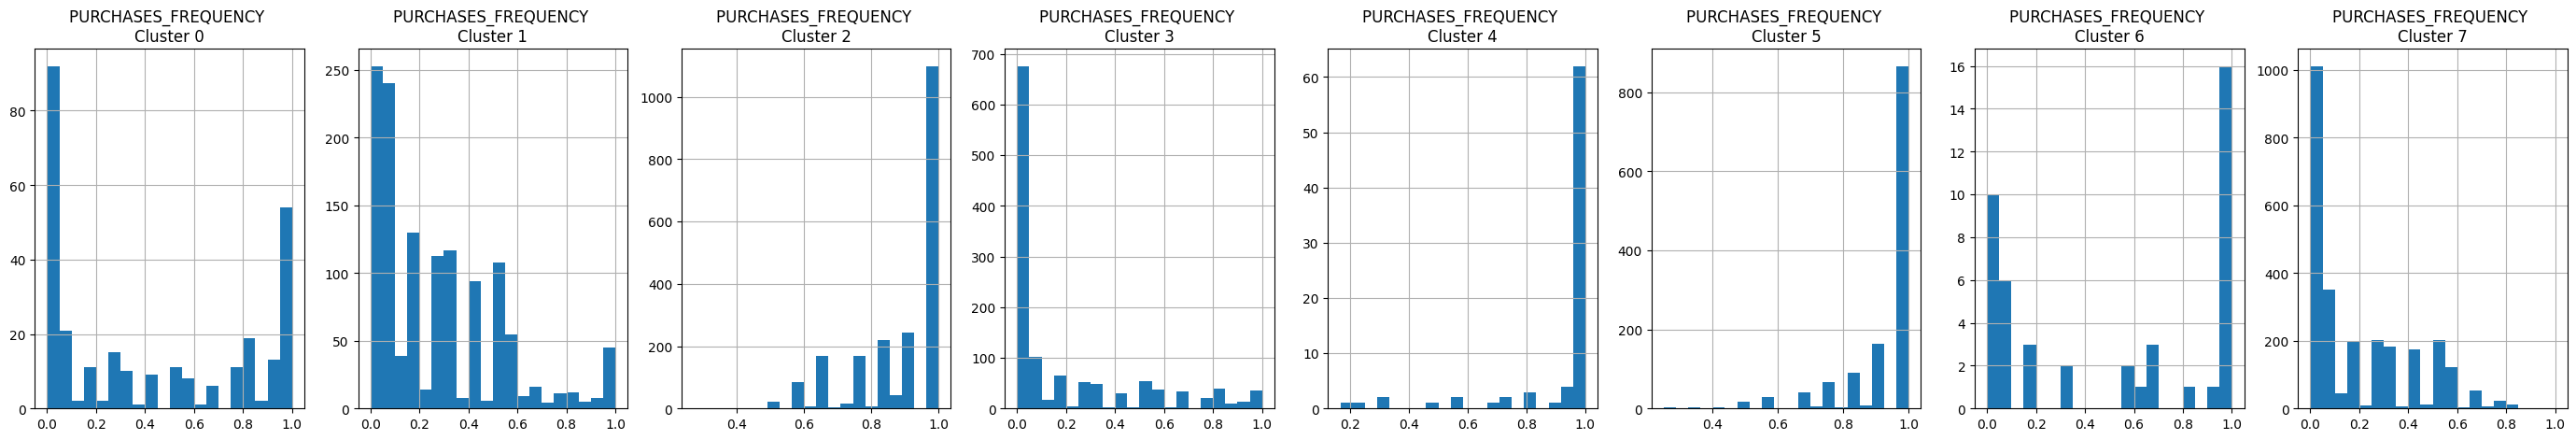

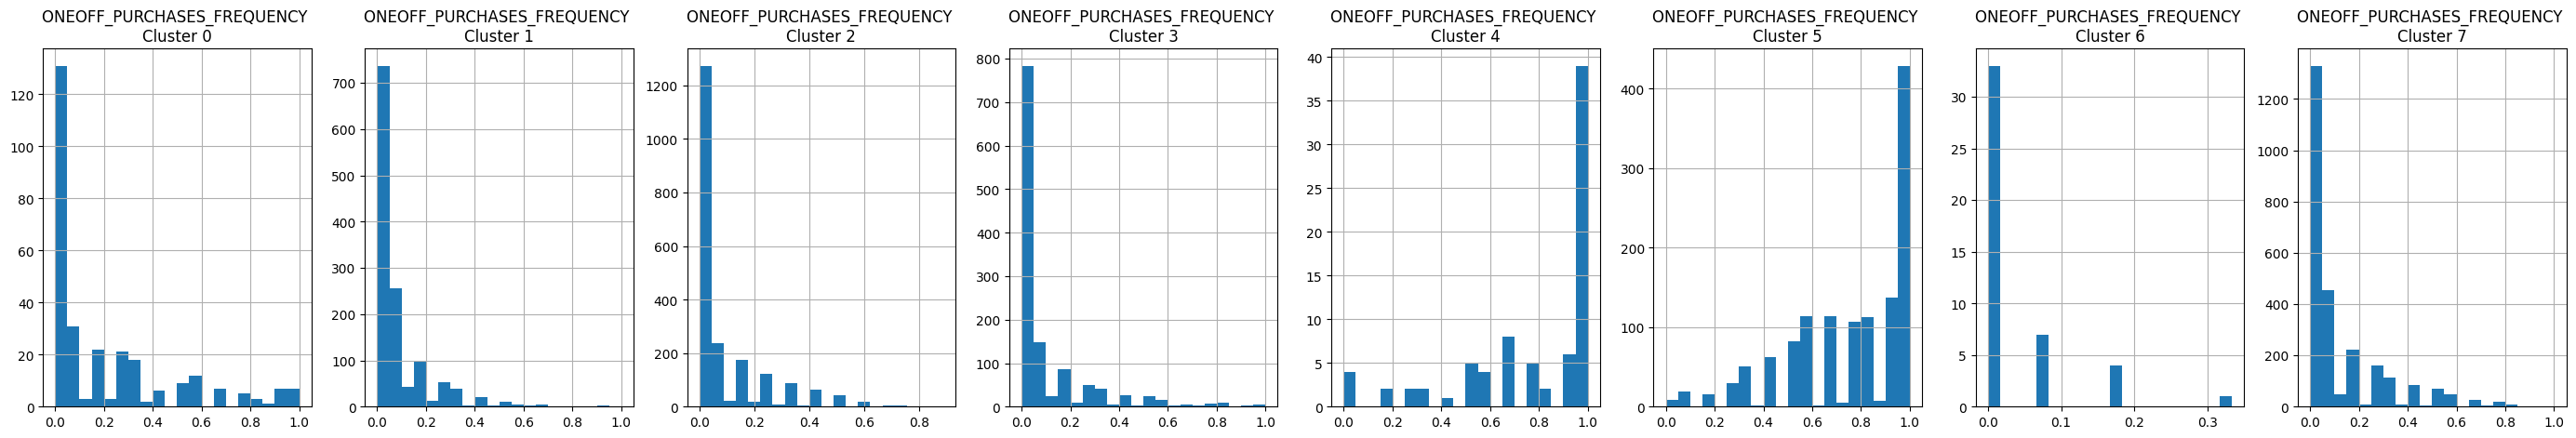

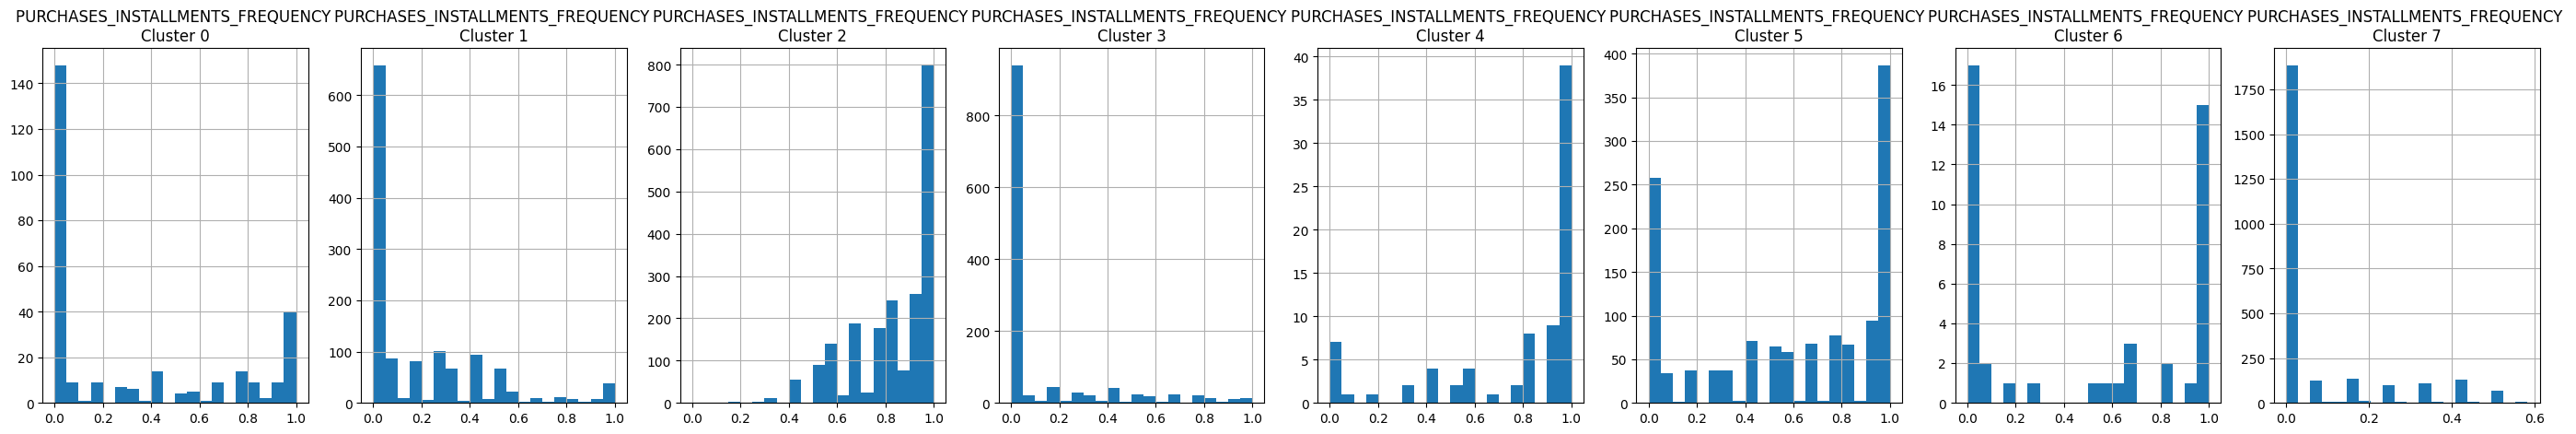

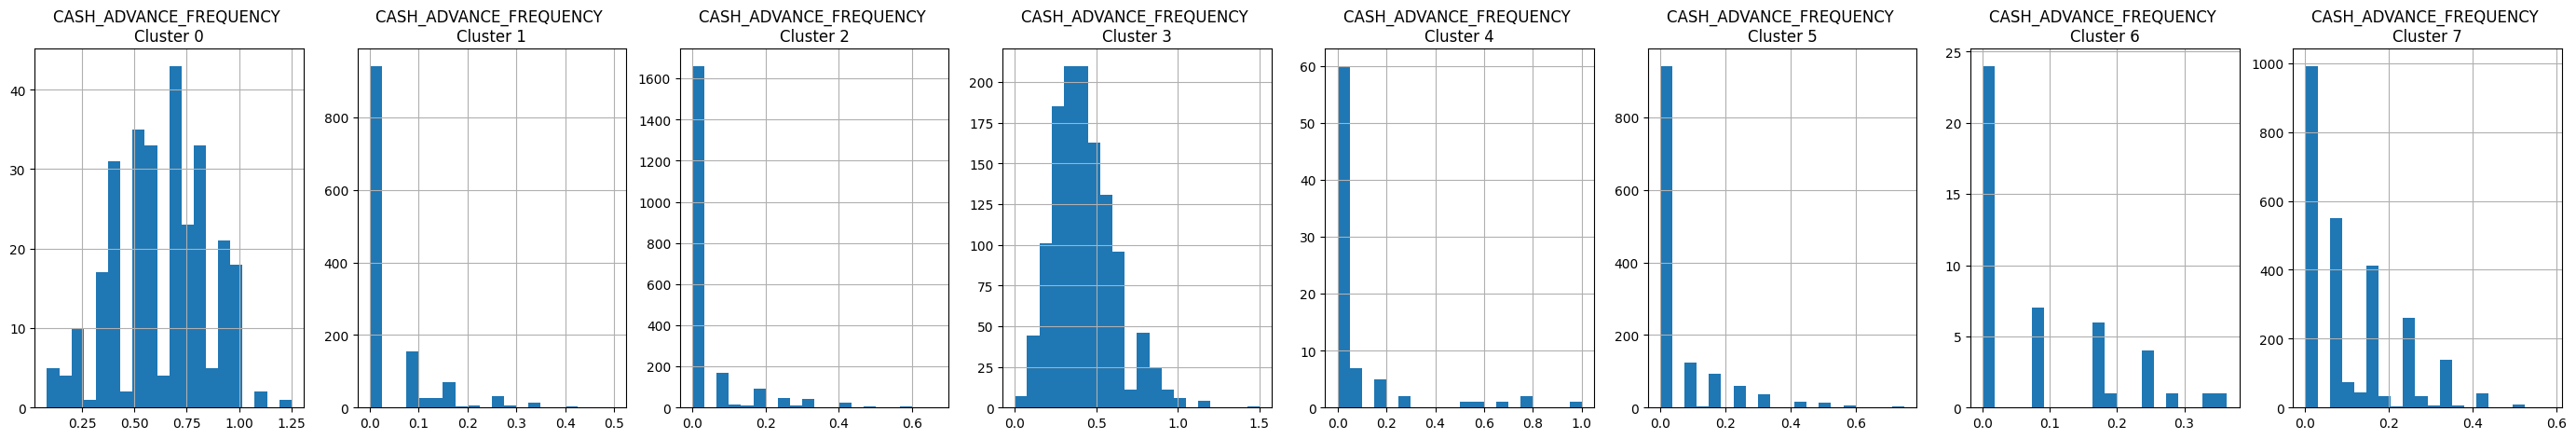

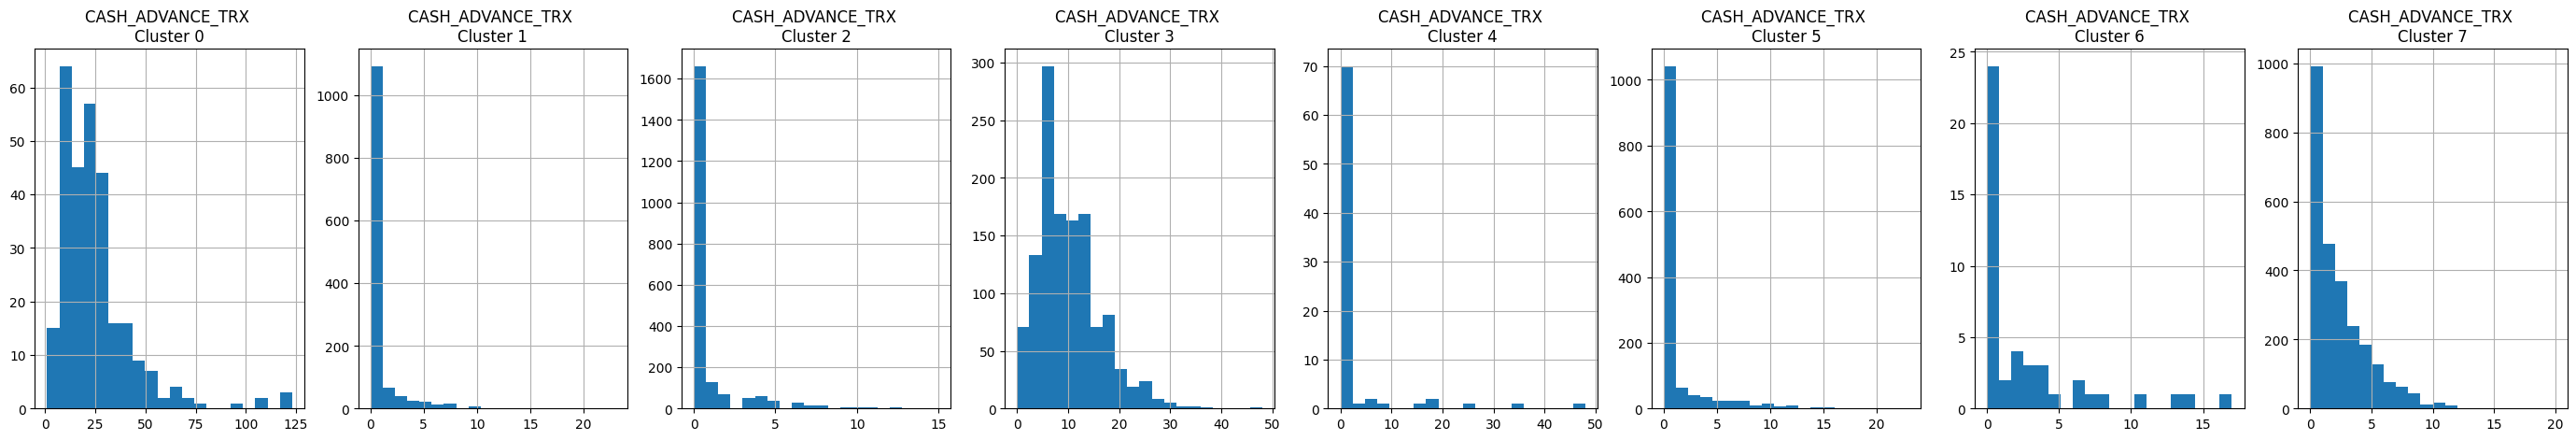

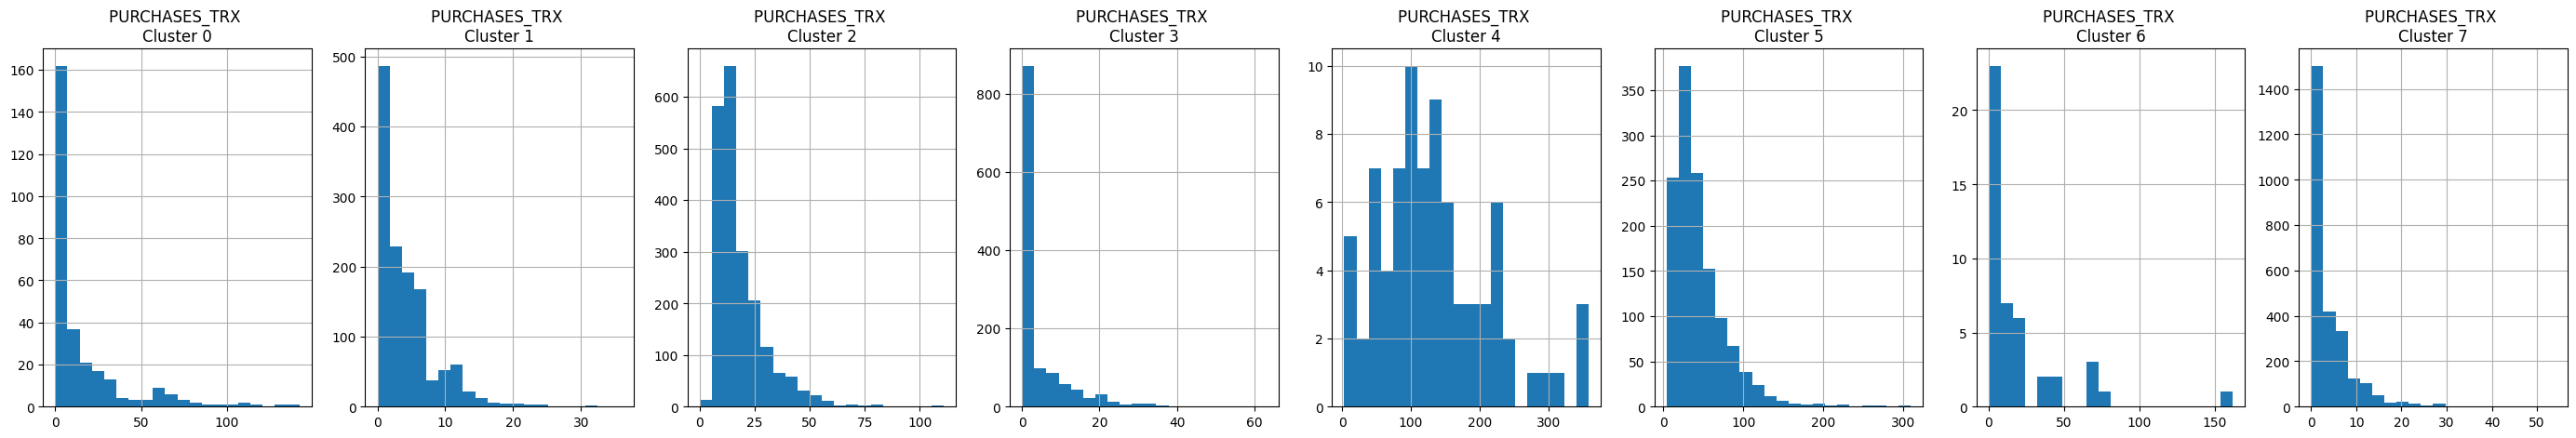

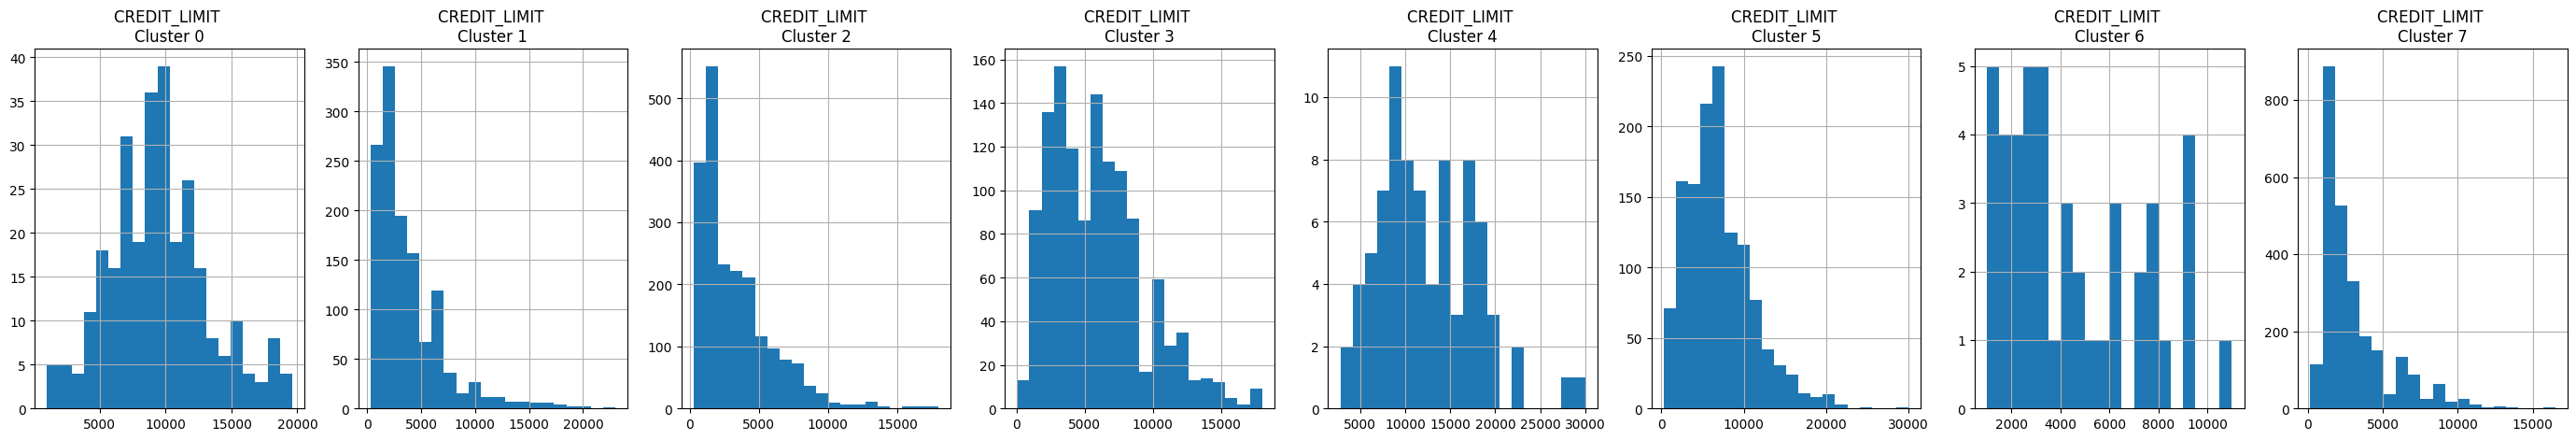

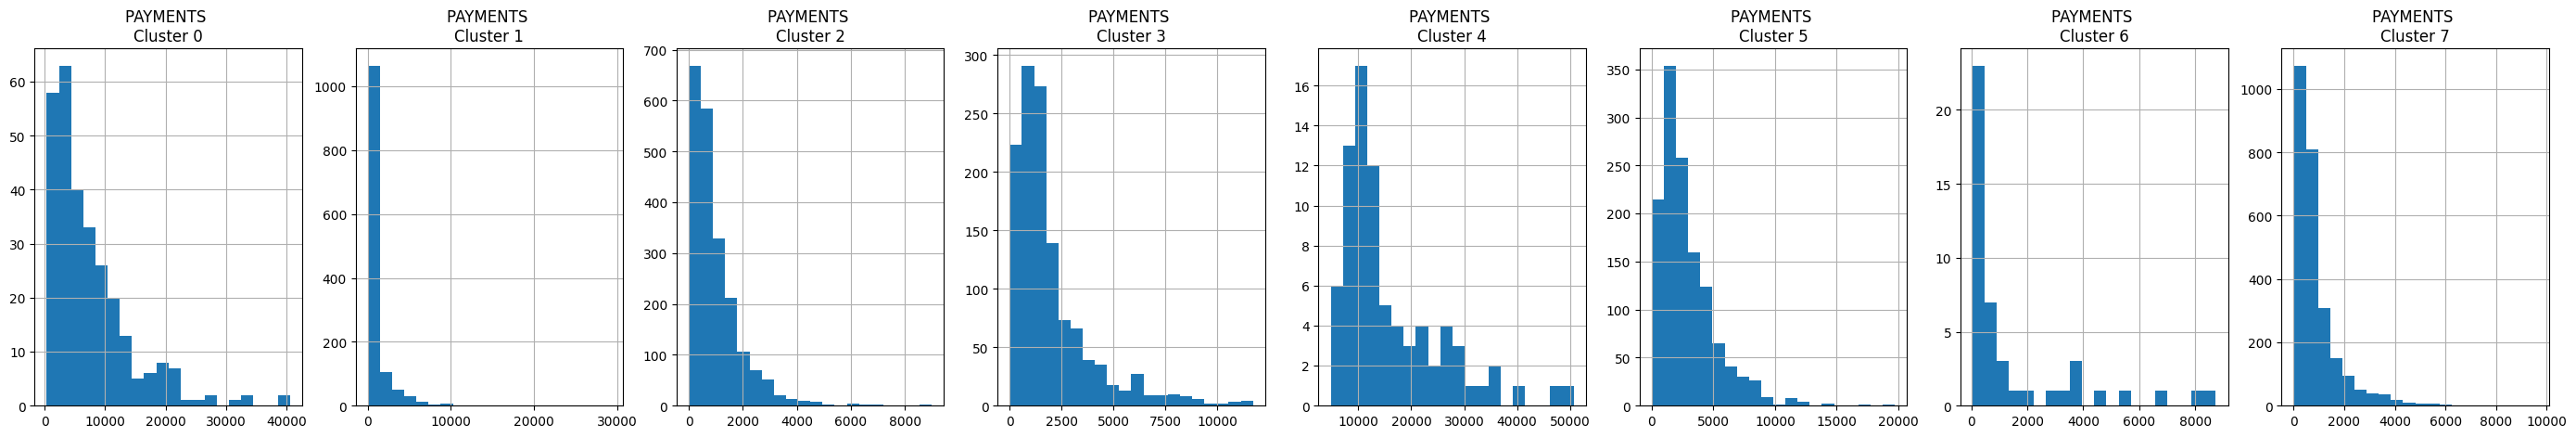

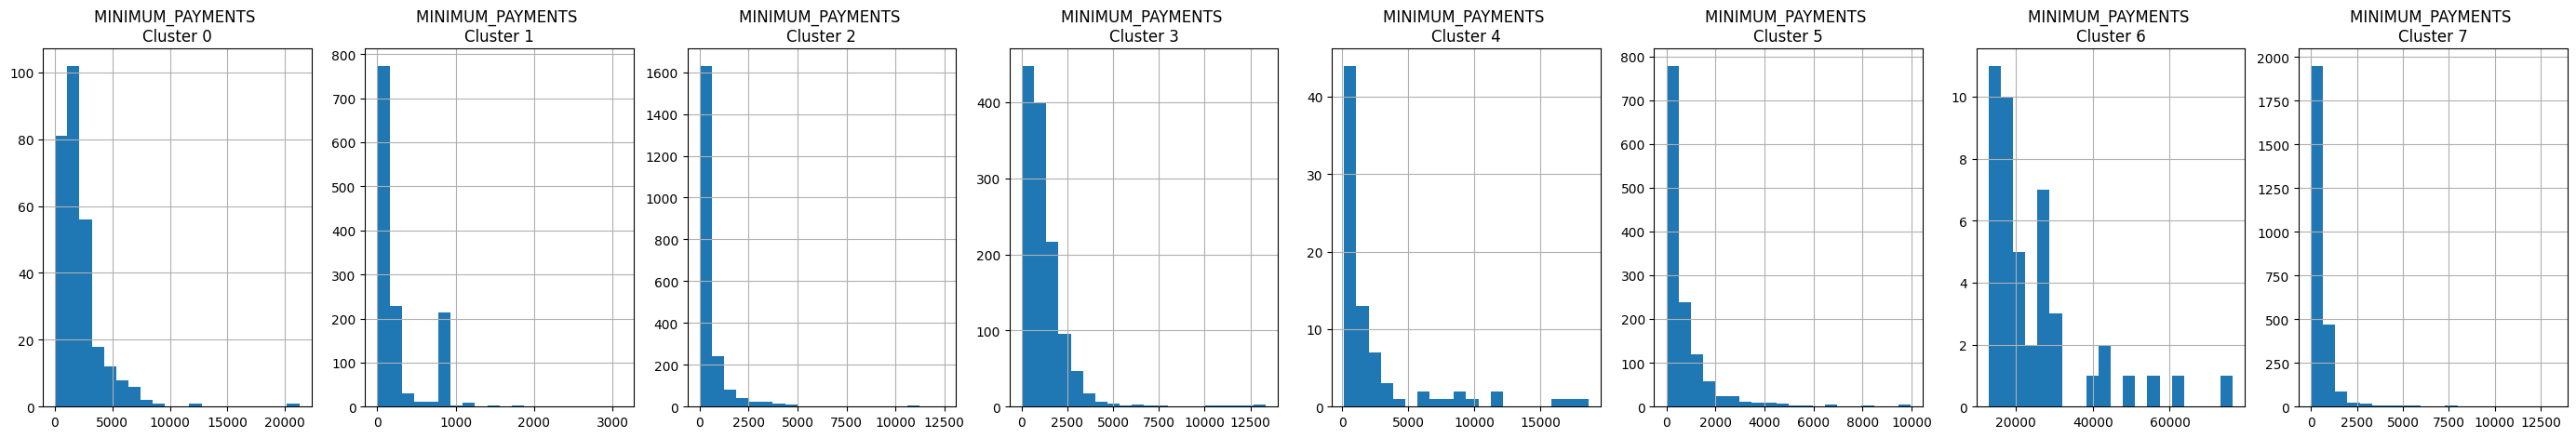

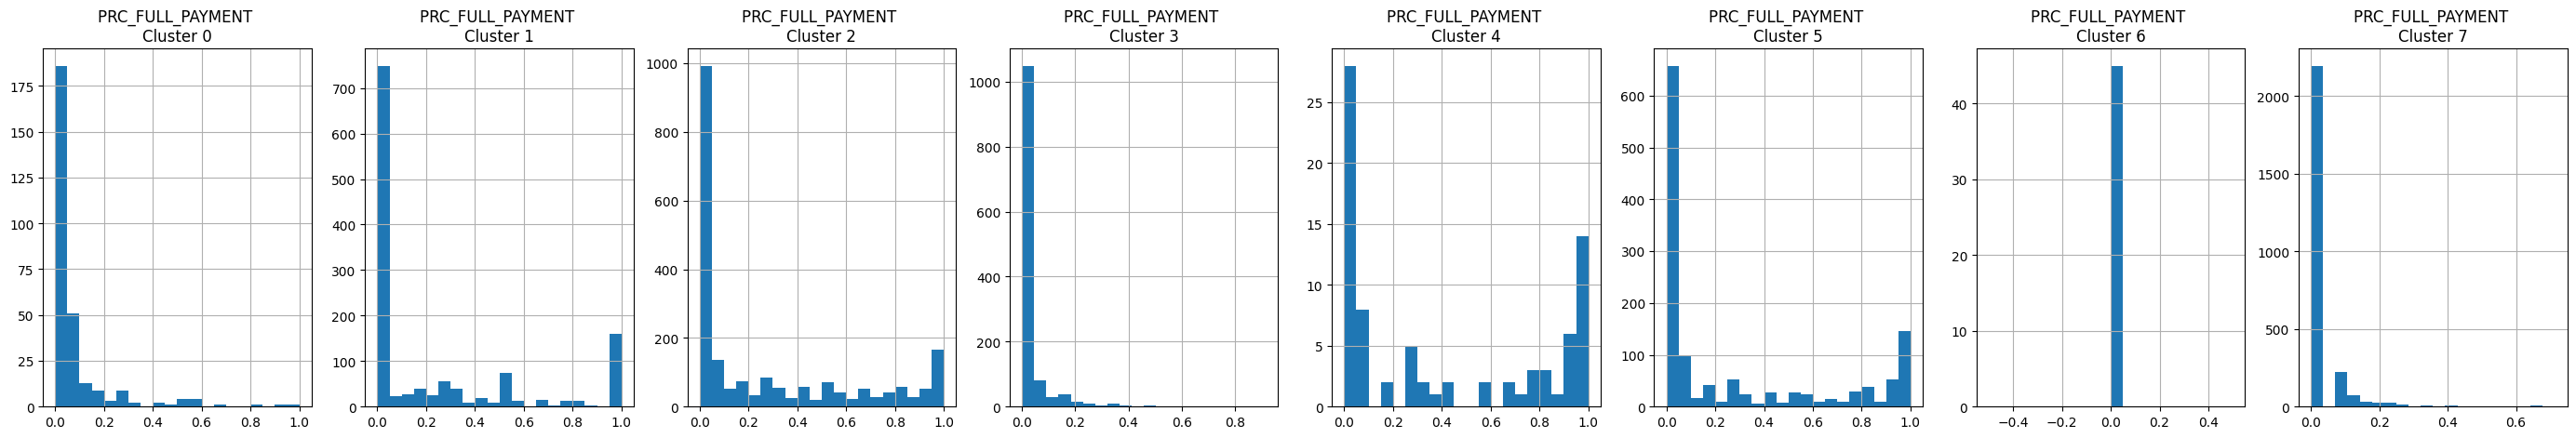

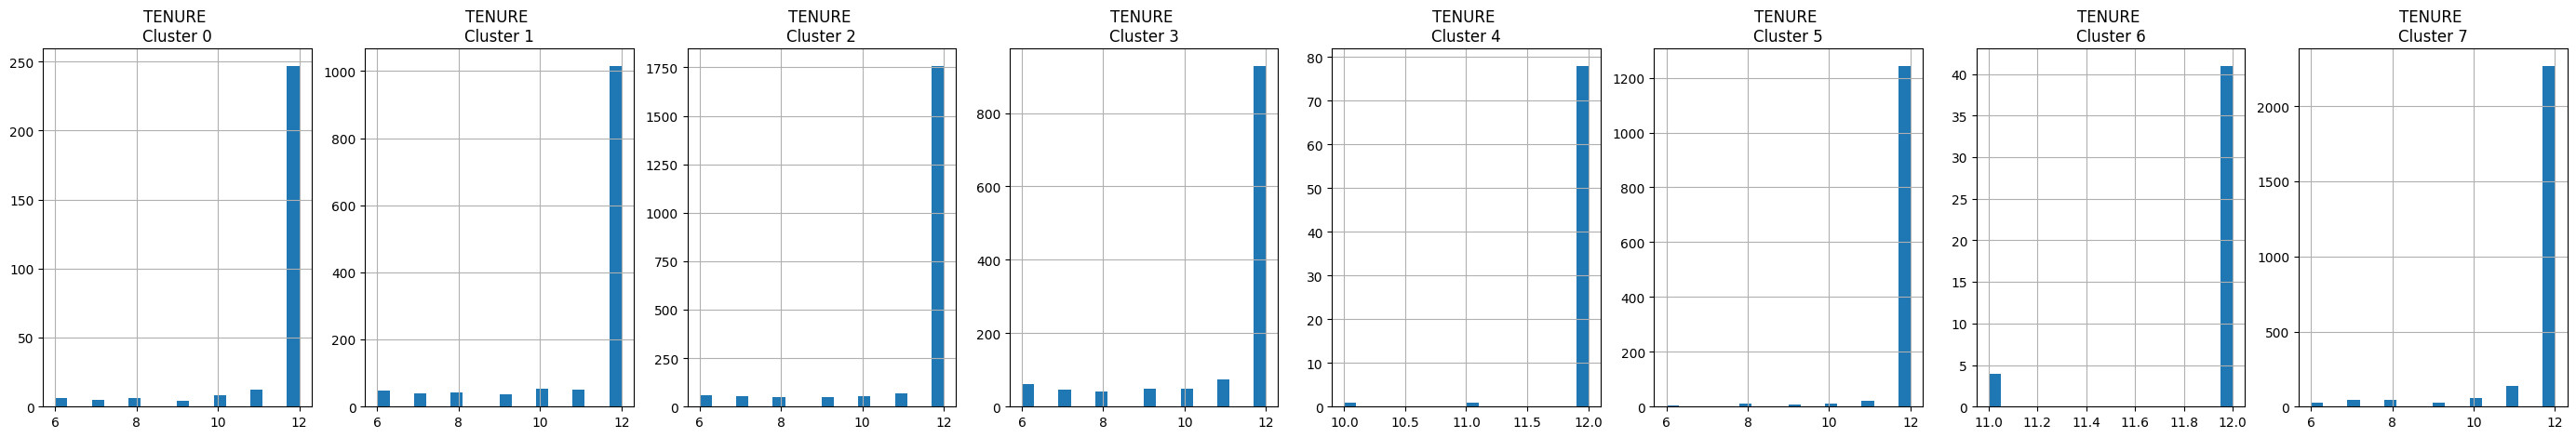

In [24]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))

    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster["cluster"] == j]
        cluster[i].hist(bins=20)
        plt.title("{} \nCluster {}".format(i, j))

plt.show()

#### PCA

In [25]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221983, -1.07645002],
       [-1.13829148,  2.50648254],
       [ 0.96968145, -0.38352447],
       ...,
       [-0.92620441, -1.81078715],
       [-2.33655155, -0.65796602],
       [-0.55642268, -0.40046764]])

In [26]:
# Create a dataframe with two components
pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138291,2.506483
2,0.969681,-0.383524
3,-0.873627,0.043167
4,-1.599434,-0.688581


In [27]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,7
1,-1.138291,2.506483,3
2,0.969681,-0.383524,5
3,-0.873627,0.043167,7
4,-1.599434,-0.688581,7


<Axes: xlabel='pca1', ylabel='pca2'>

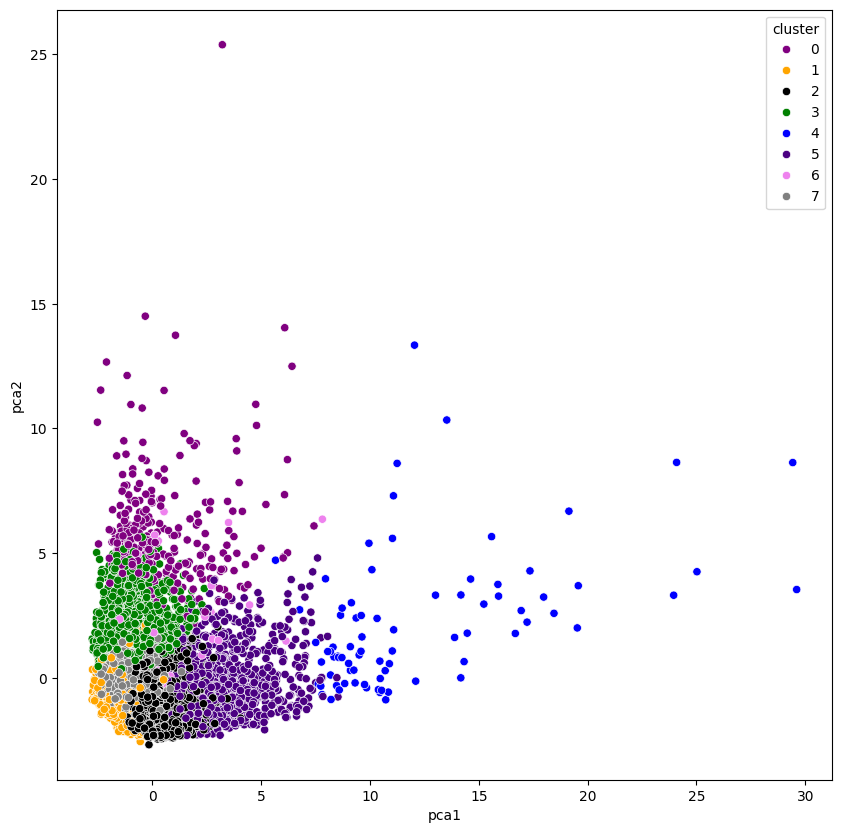

In [28]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=pca_df,
    palette=["purple", "orange", "black", "green", "blue", "indigo", "violet", "gray"],
)

Above suggests clusters 1 (orange), 0 (violet), and 4 (blue) as most difference. Orange is condensed and central to rest of clusters. Violet and blue are widely disperesed on different side of the component

##### AutoEncoder (for higher-level dimensionality reduction)

In [29]:
from tensorflow.keras.layers import (
    Input,
    Add,
    Dense,
    Activation,
    ZeroPadding2D,
    BatchNormalization,
    Flatten,
    Conv2D,
    AveragePooling2D,
    MaxPooling2D,
    Dropout,
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

2024-04-19 21:28:52.467626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 21:28:53.548942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:
input_df = Input(shape=(17,))

# Encoder
x = Dense(7, activation="relu")(input_df)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(x)

# Bottleneck
encoded = Dense(10, activation="relu", kernel_initializer="glorot_uniform")(x)

# Decoder
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)

decoded = Dense(17, kernel_initializer="glorot_uniform")(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

2024-04-19 21:28:54.162050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 21:28:54.395333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 21:28:54.395431: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 21:28:54.398647: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-19 21:28:54.398736: I external/local_xla/xla/stream_executor

In [31]:
autoencoder.fit(
    creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1
)

Epoch 1/25


I0000 00:00:1713558536.594429  322505 service.cc:145] XLA service 0x7f76cc0053f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713558536.594646  322505 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-04-19 21:28:56.657538: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-19 21:28:56.907640: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


38/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6697

I0000 00:00:1713558538.573416  322505 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5692
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2684
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2233
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1766
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1462
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1326
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1131
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1117
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0910
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0884
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0851
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0786
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0751
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0745
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0658
Epoch 16/25
70/70 ━━━━━━━━━━━

In [32]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2000)           │     4,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,802,931 (71.73 MB)

 Trainable params: 6,267,643 (23.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,535,288 (47.82 MB)

In [33]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [34]:
pred.shape

(8950, 10)

In [35]:
pred

array([[0.02145491, 0.        , 0.00074597, ..., 0.04572496, 0.        ,
        0.02744288],
       [0.09721001, 0.04359287, 0.        , ..., 0.03162622, 0.05192861,
        0.        ],
       [0.01954967, 0.07046116, 0.03291288, ..., 0.00546369, 0.03401414,
        0.        ],
       ...,
       [0.12578776, 0.03602771, 0.06162599, ..., 0.07386281, 0.03826768,
        0.00168521],
       [0.06642634, 0.        , 0.04368015, ..., 0.0740003 , 0.02429617,
        0.        ],
       [0.07527685, 0.0055265 , 0.0695198 , ..., 0.0599351 , 0.04102698,
        0.        ]], dtype=float32)

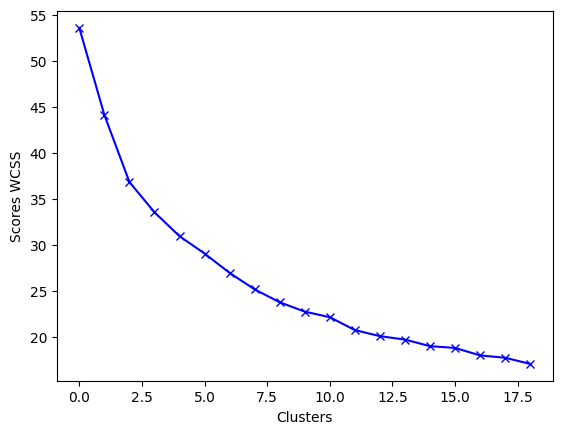

In [36]:
# optimal number of clusters
scores_2 = []

range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_2, "bx-")
plt.xlabel("Clusters")
plt.ylabel("Scores WCSS")
plt.show()

The WCSS error is a lot less for the autoencoder. Comparing it to the prev we see both have there first major elbow at the fourth cluster

/tmp/ipykernel_279184/2709689228.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, "bx-", color="r")


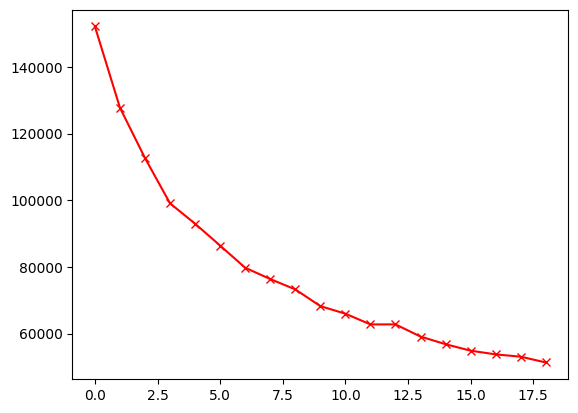

In [37]:
plt.plot(scores_1, "bx-", color="r")

In [38]:
# Fitting KMeans with 4 clusters
kmeans = KMeans(4, random_state=42)
kmeans.fit(pred)
labels = kmeans.labels_

display(labels)
kmeans.cluster_centers_.shape

array([1, 3, 3, ..., 0, 0, 0], dtype=int32)

(4, 10)

In [39]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({"cluster": labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [40]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=prin_comp, columns=["pca1", "pca2"])

In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.028041,0.017056,1
1,0.032059,-0.052913,3
2,0.017406,-0.032214,3
3,-0.020515,0.023698,1
4,-0.024605,0.020210,1


In [45]:
pca_df['cluster'].value_counts()

cluster
1    6110
3    1679
0     925
2     236
Name: count, dtype: int64

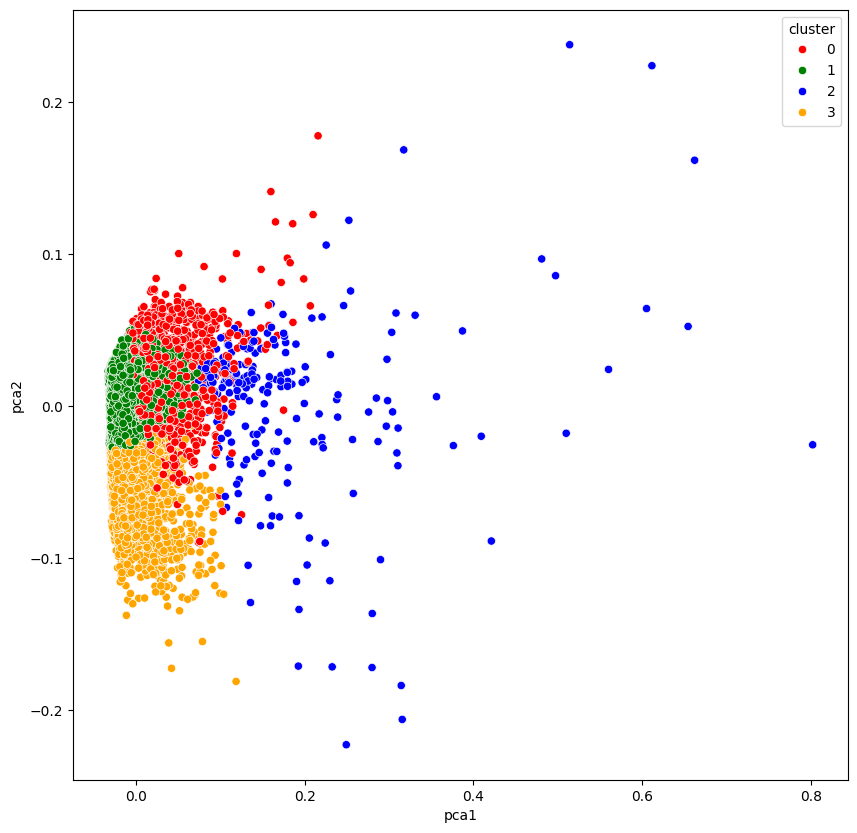

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=pca_df,
    palette=["red", "green", "blue", "orange"],
)

We want to focus to focus on non-sparse clusters with a consistent behaviour for a represenative cluster.

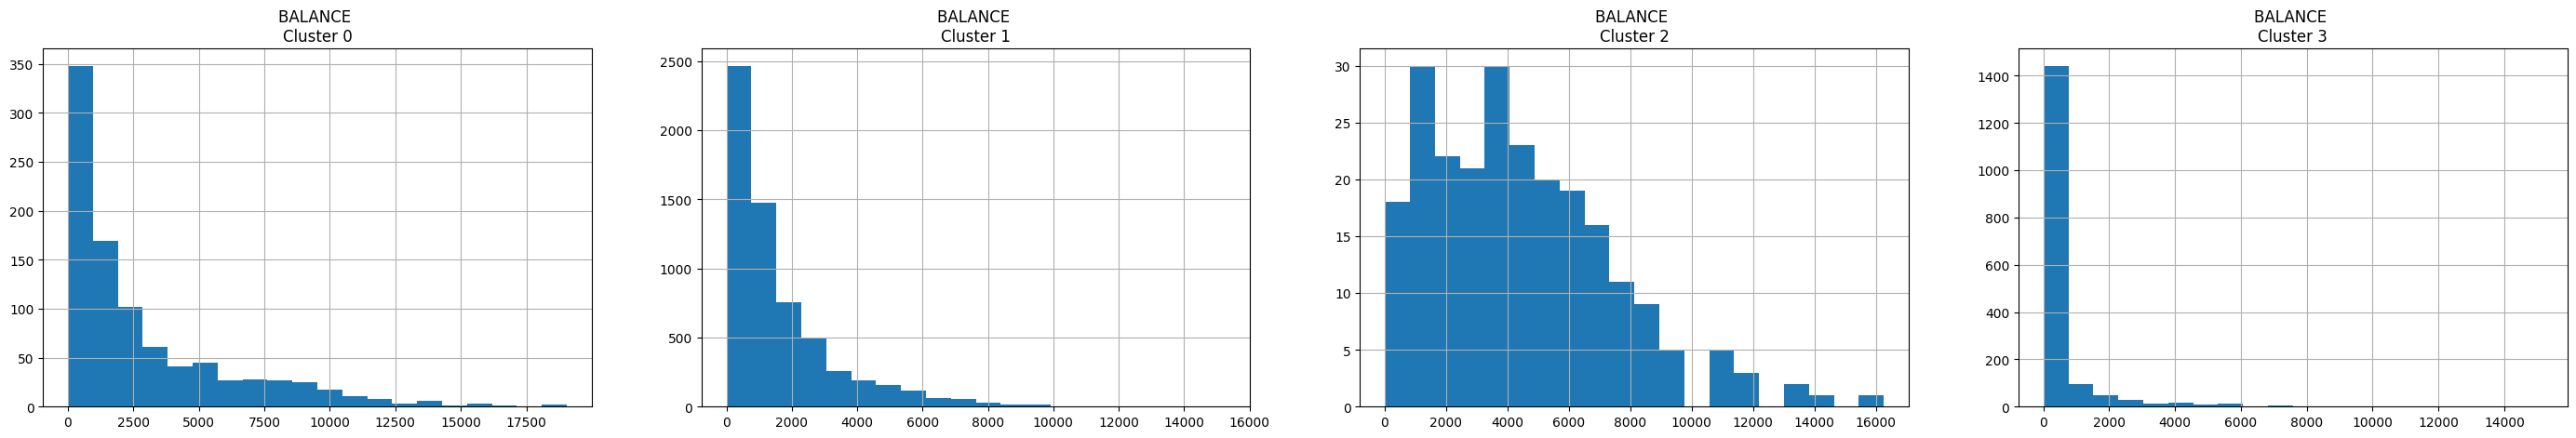

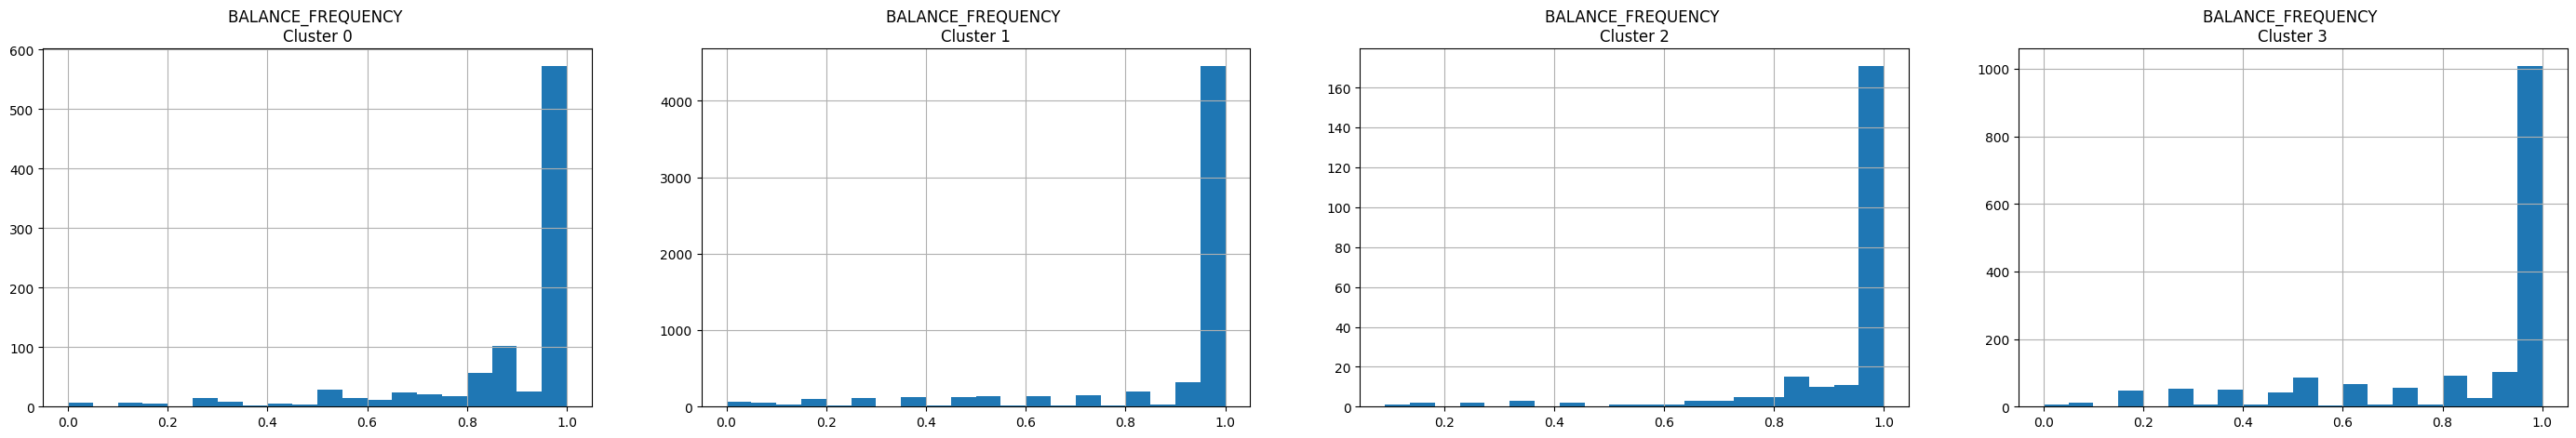

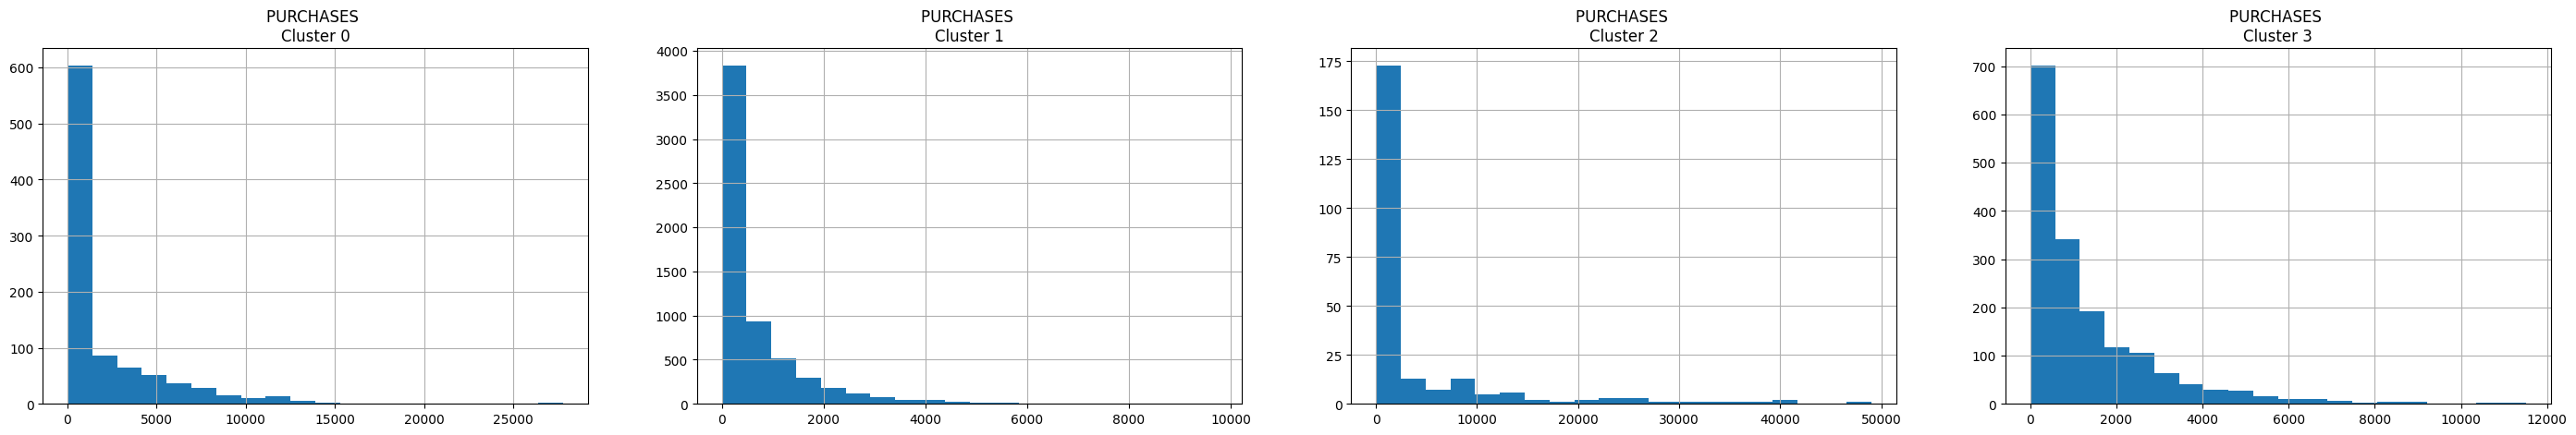

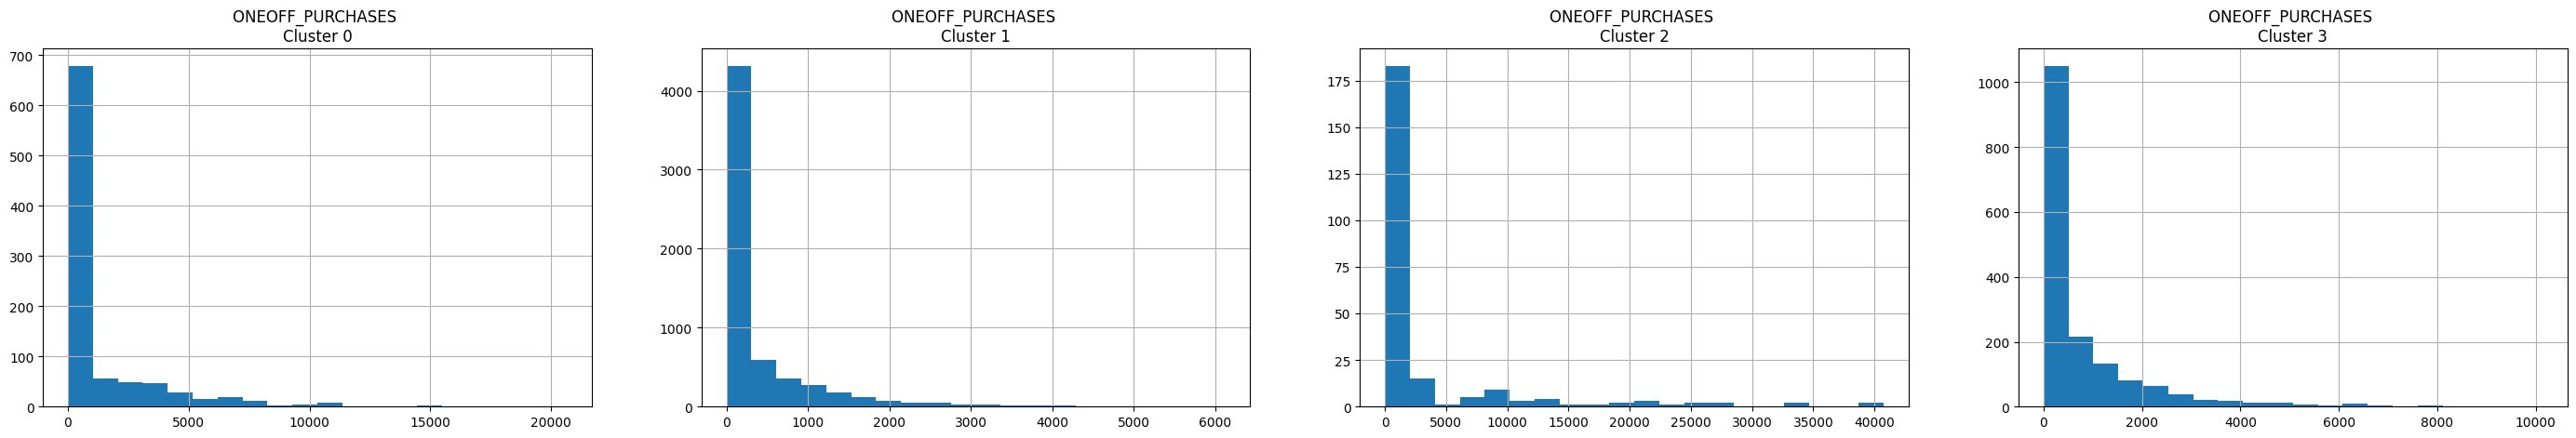

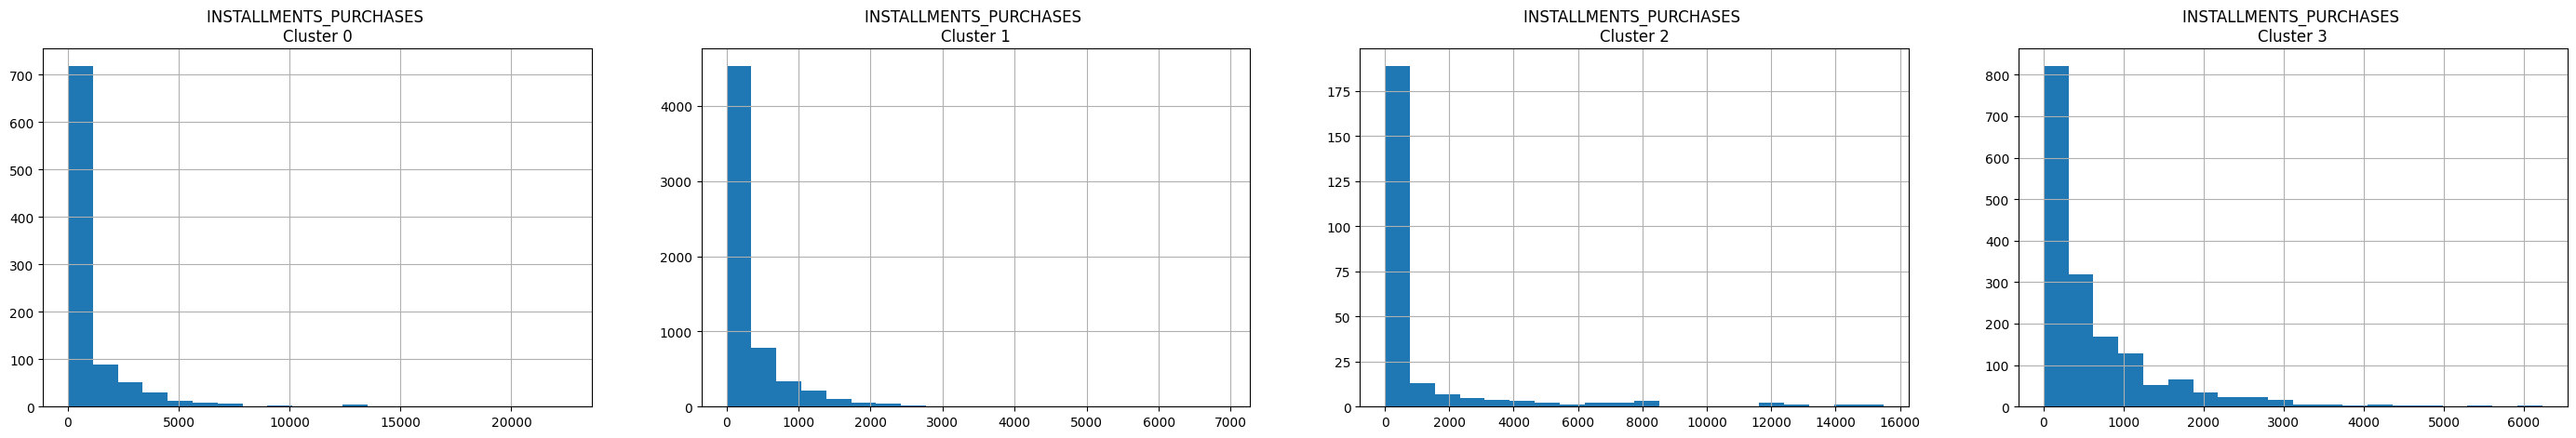

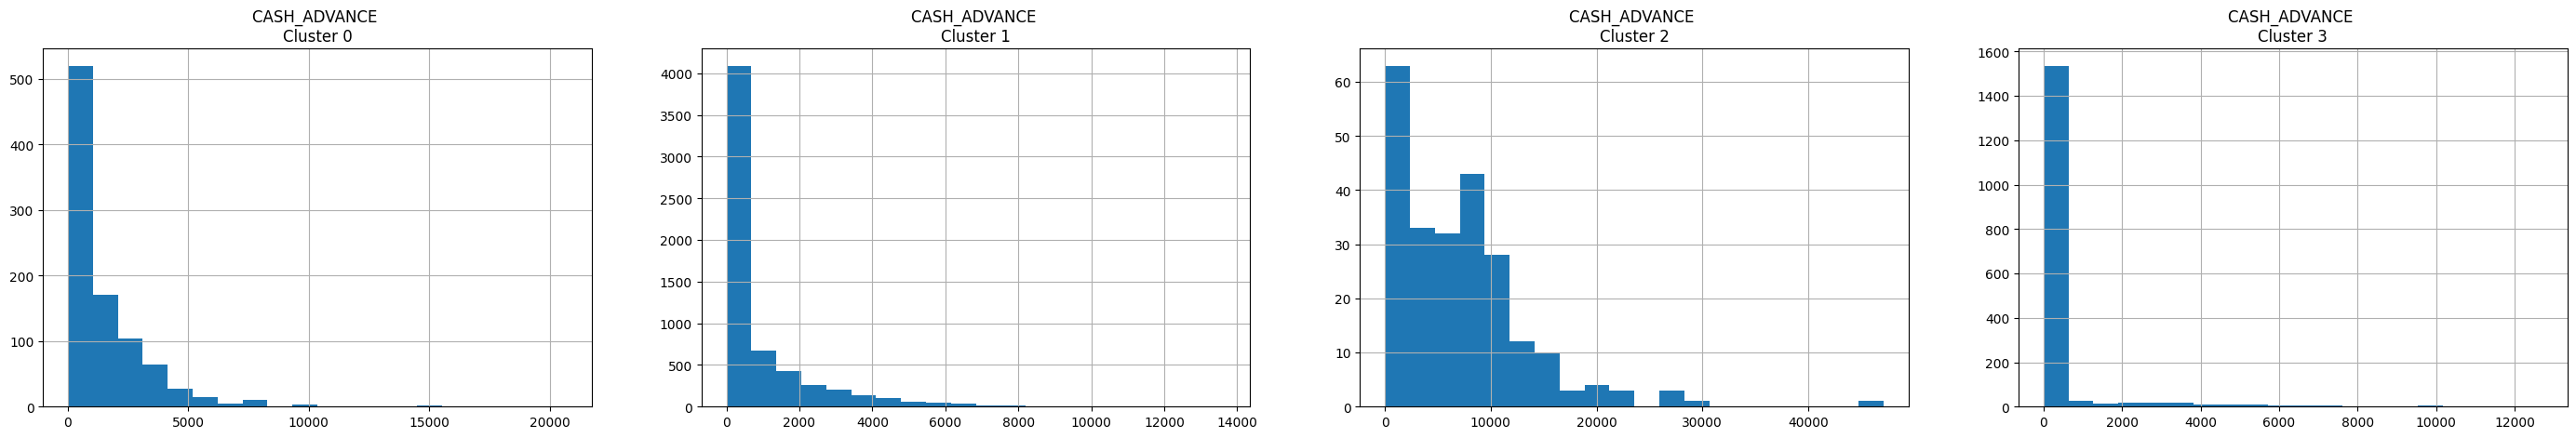

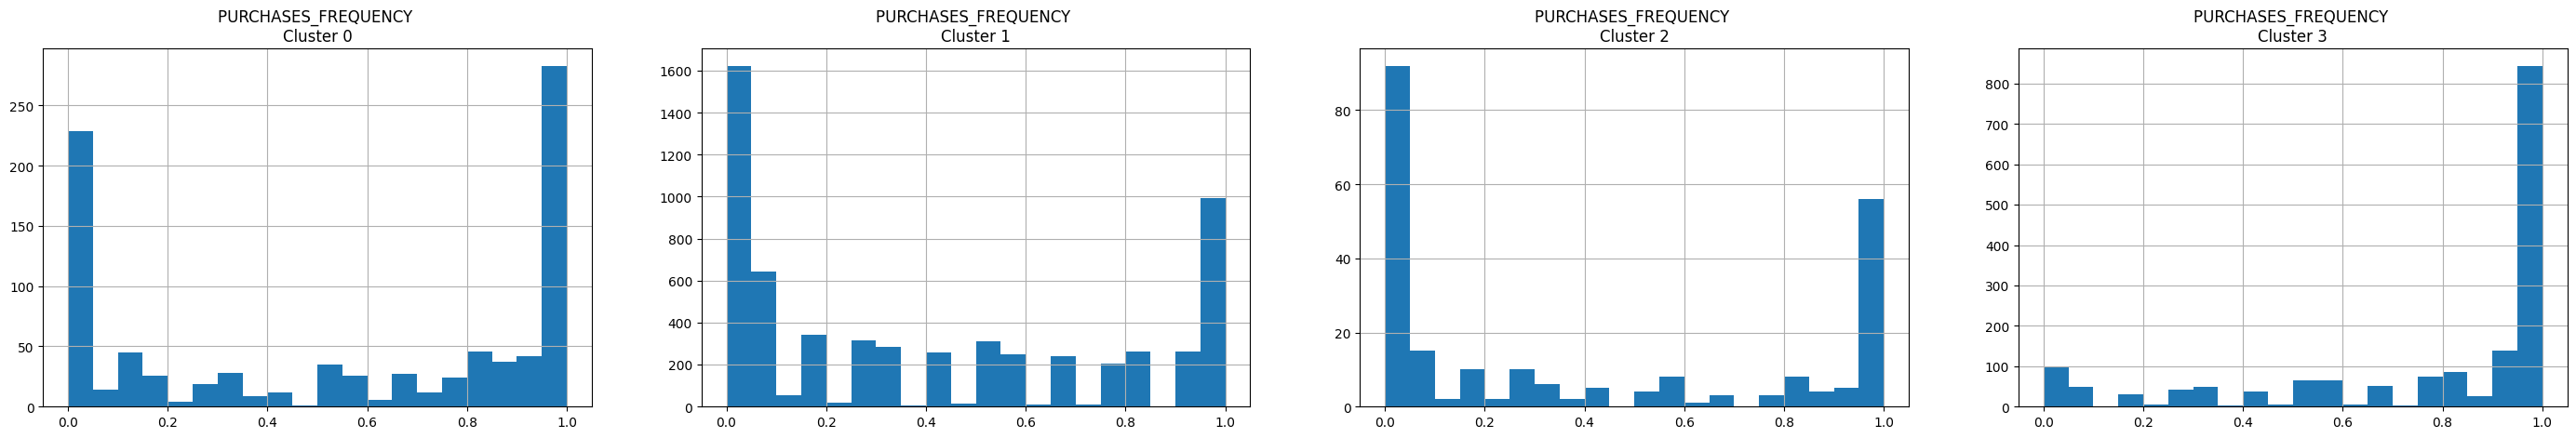

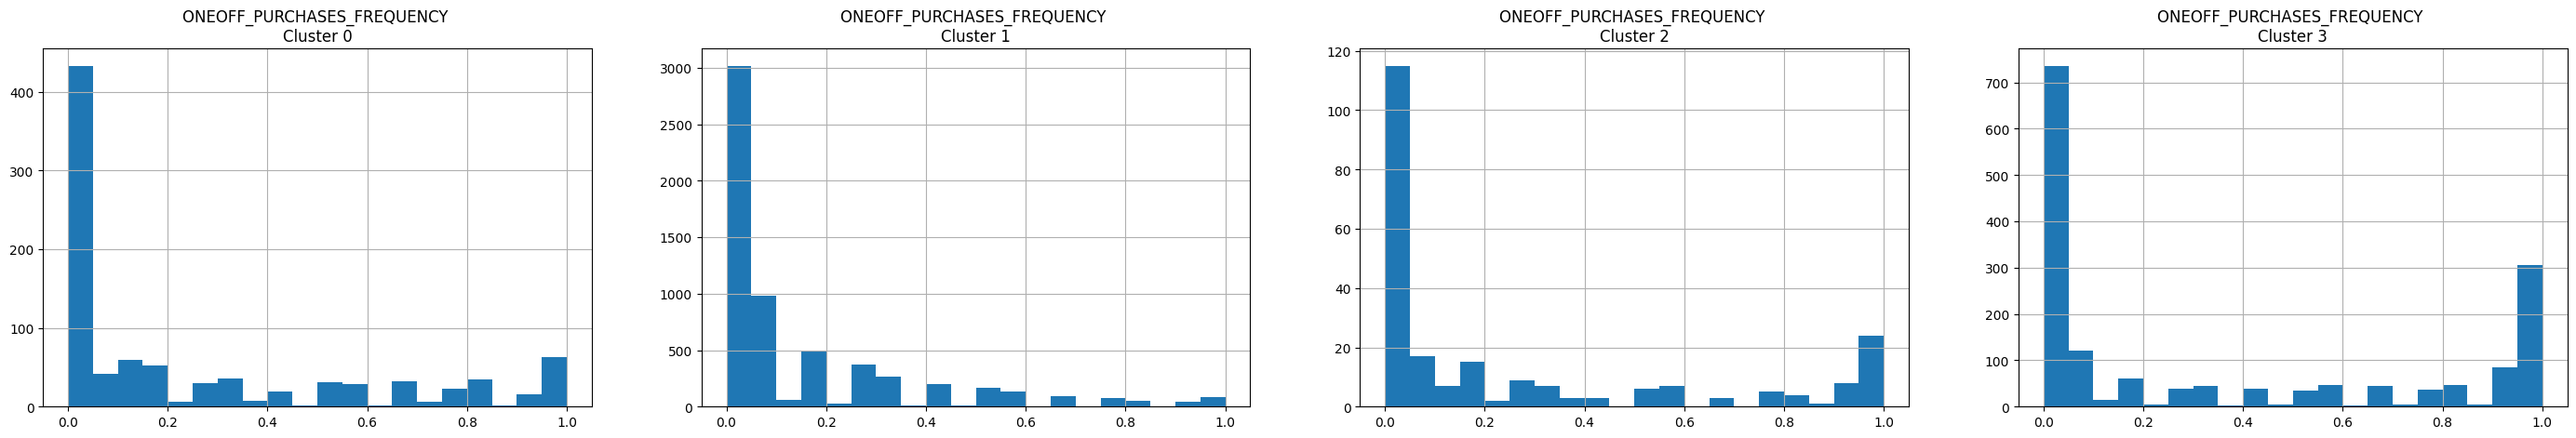

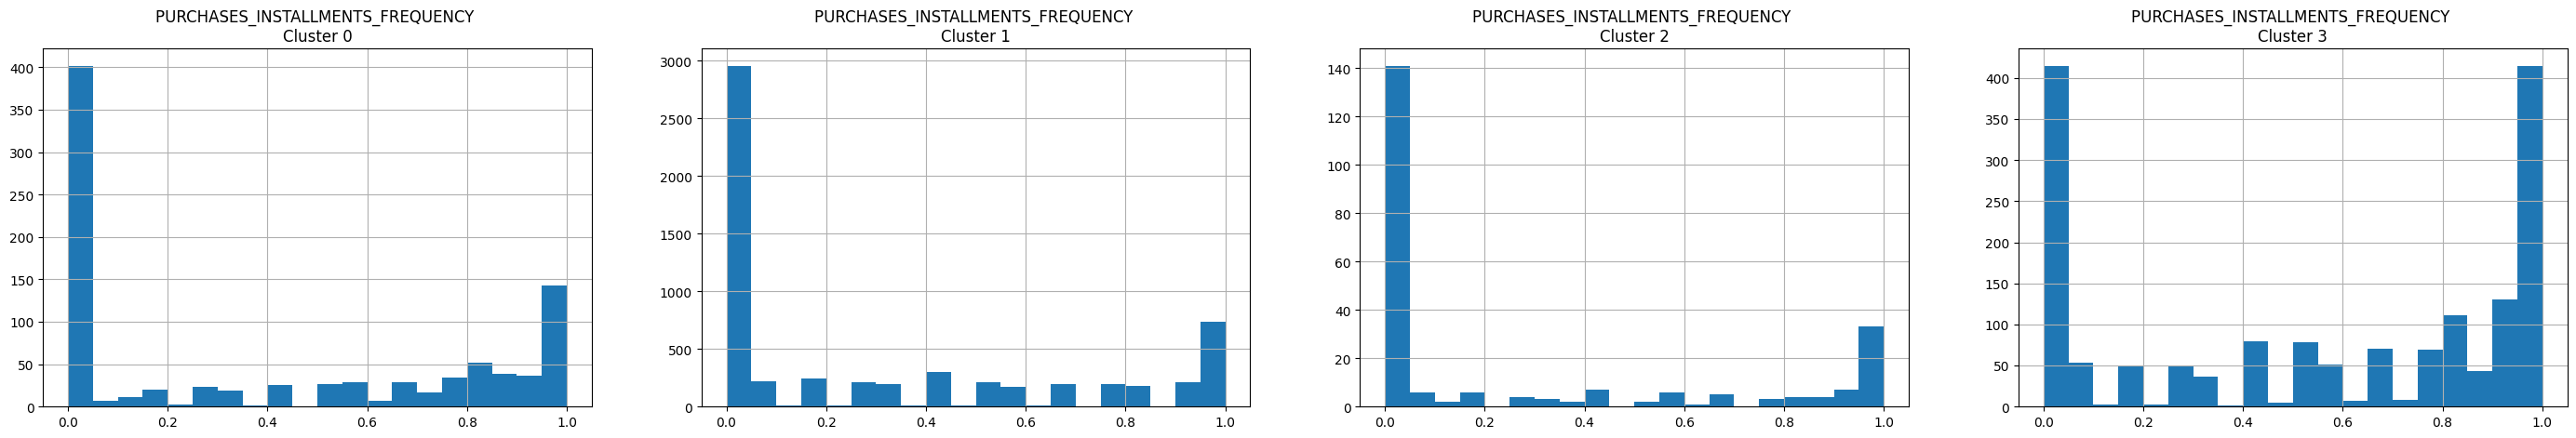

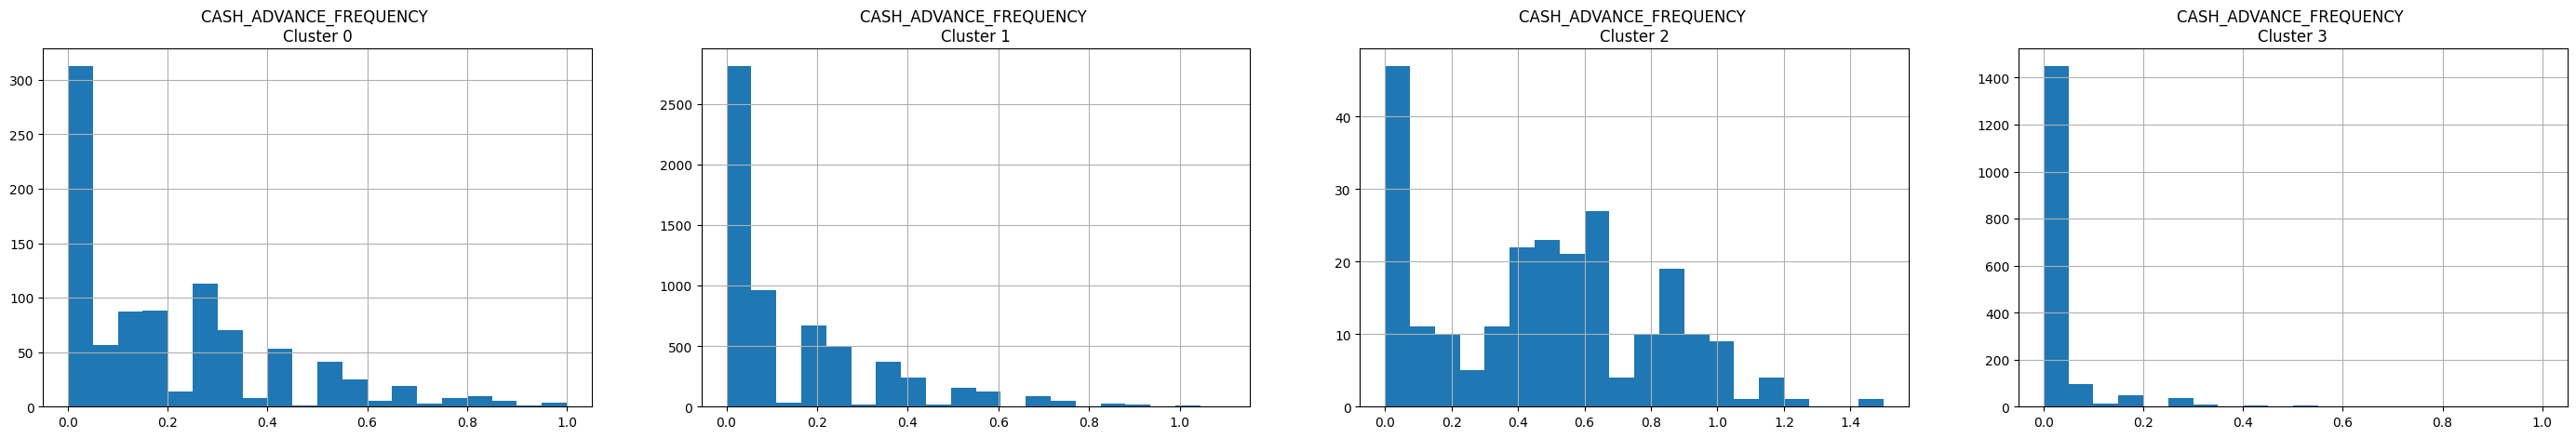

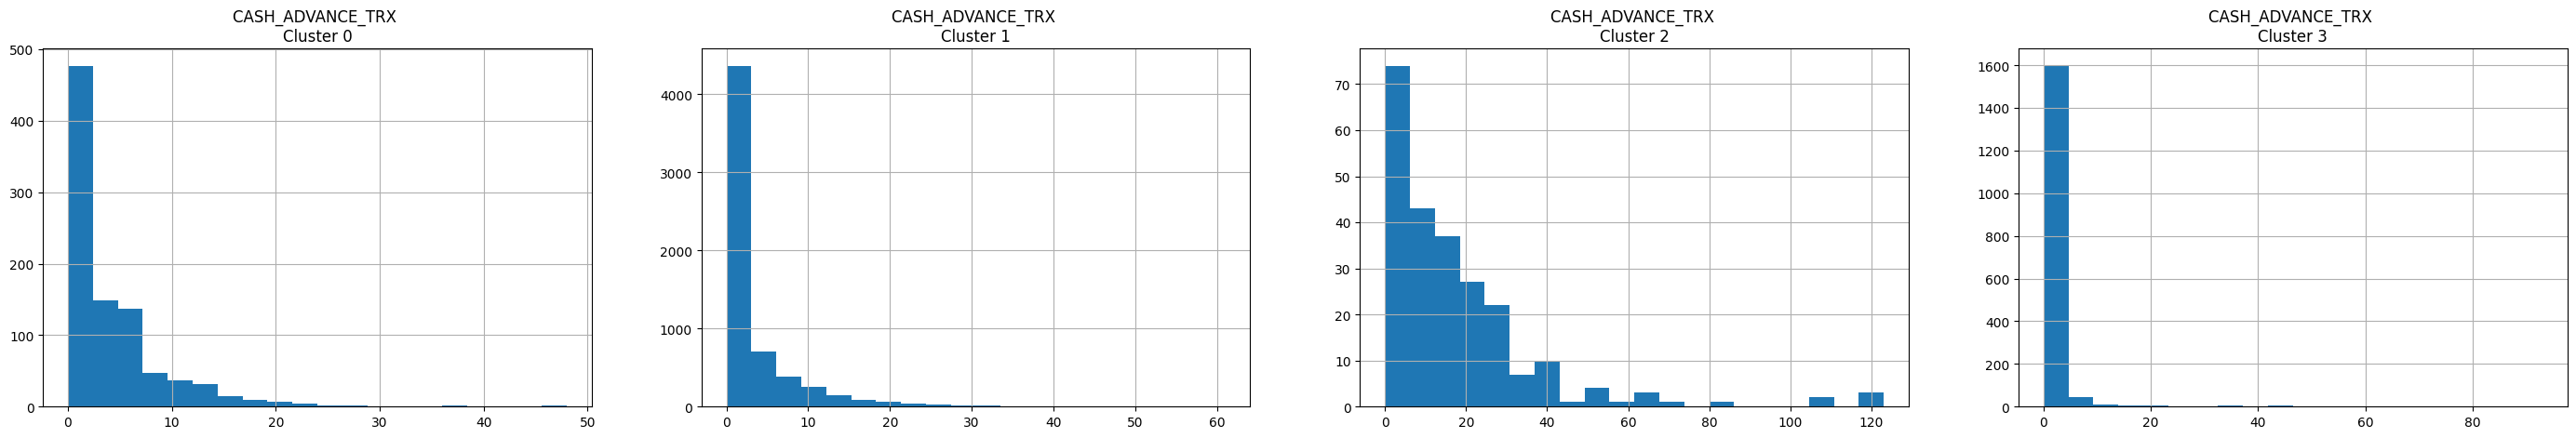

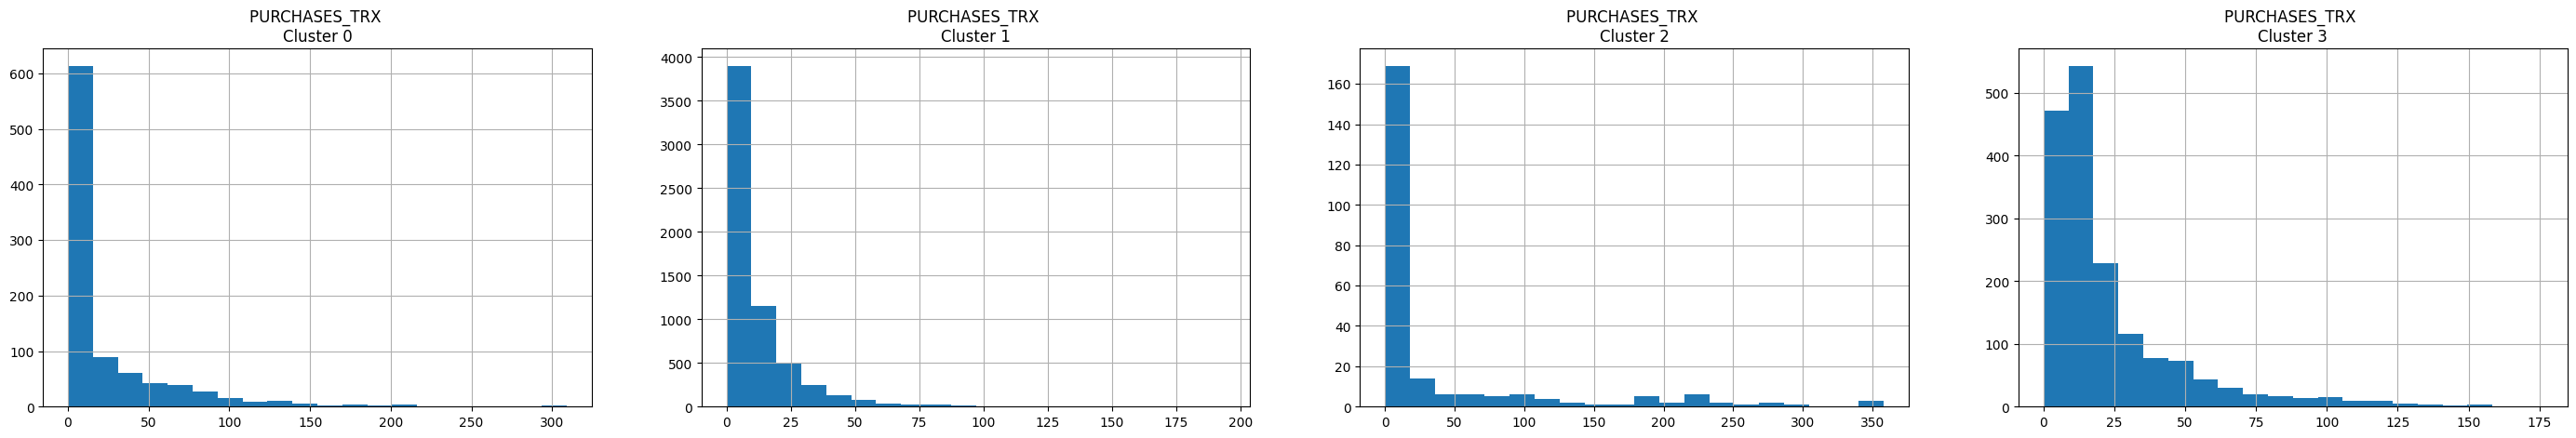

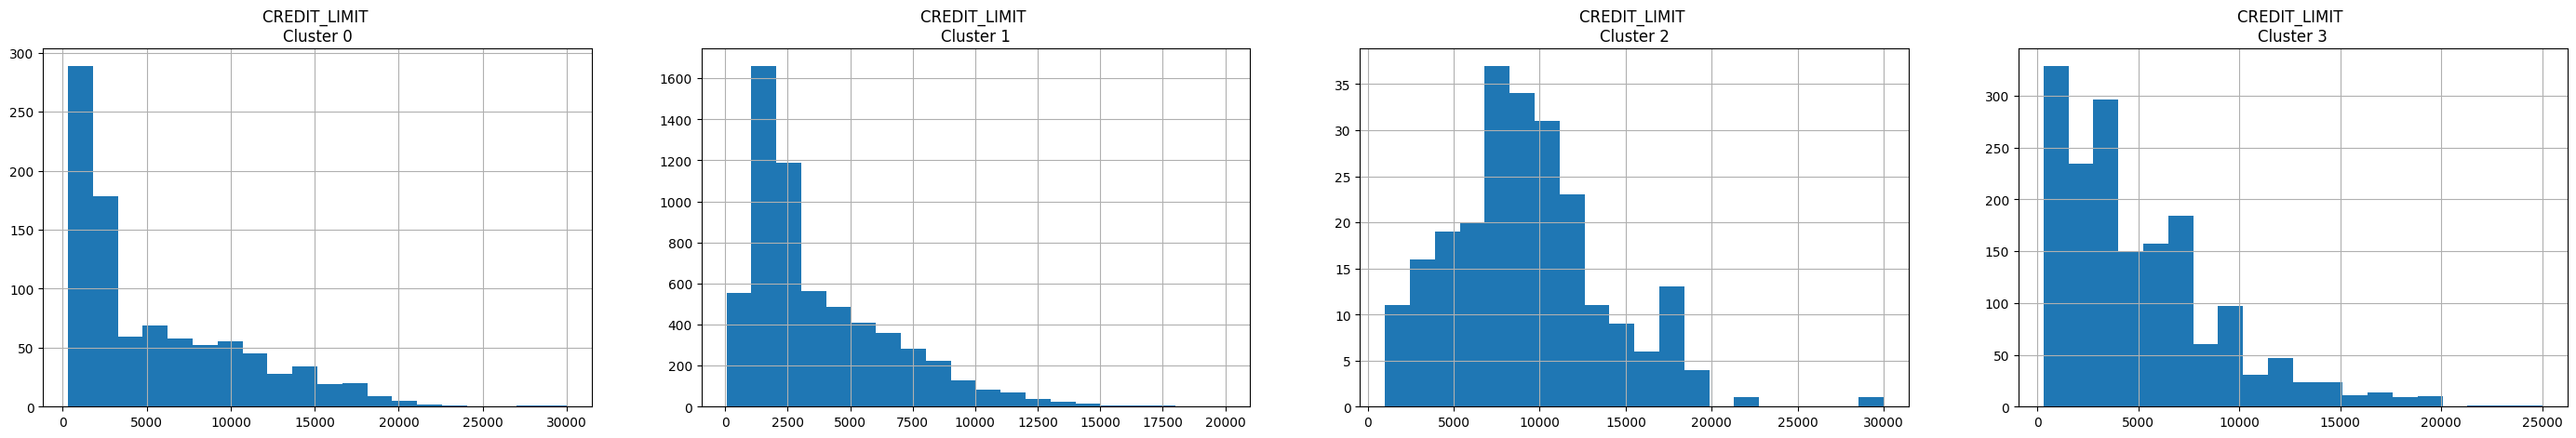

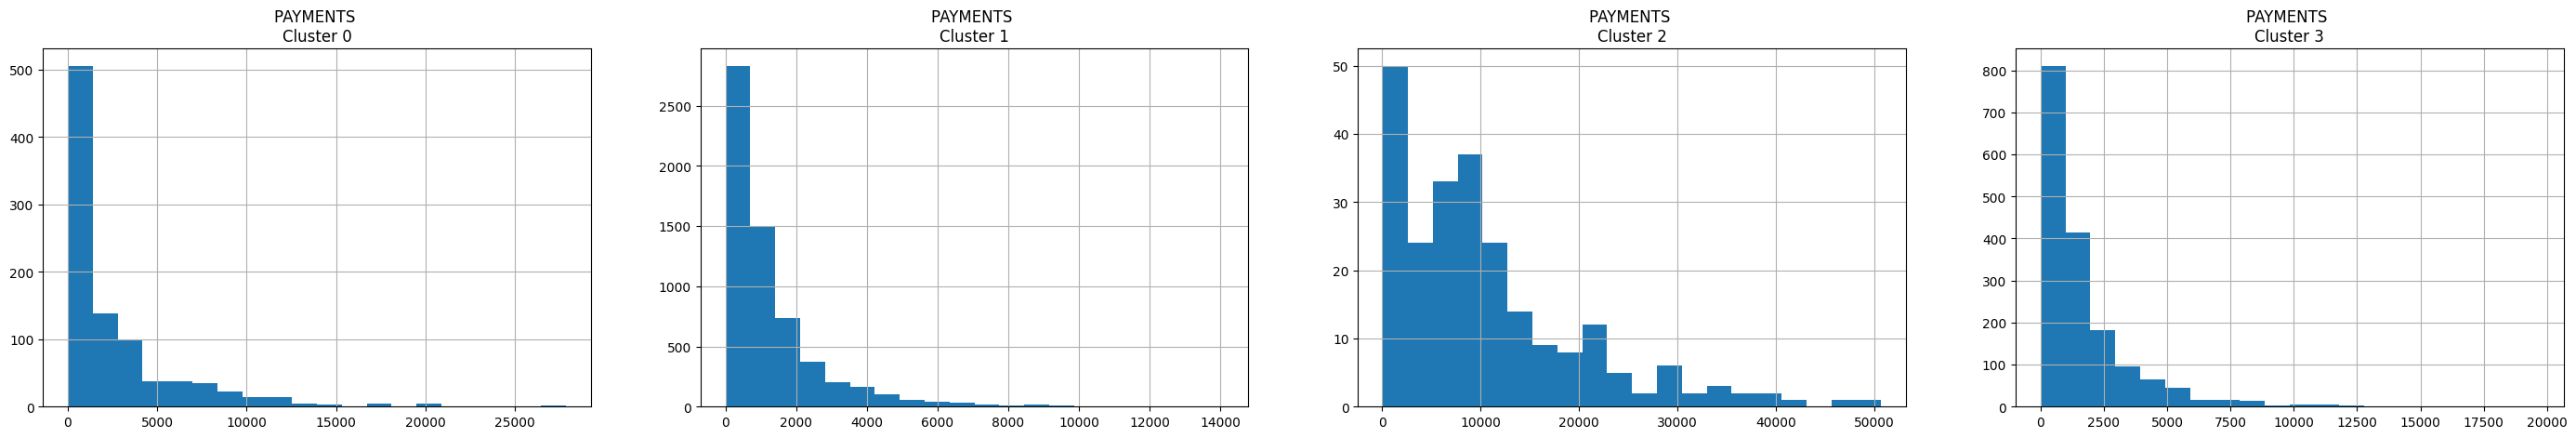

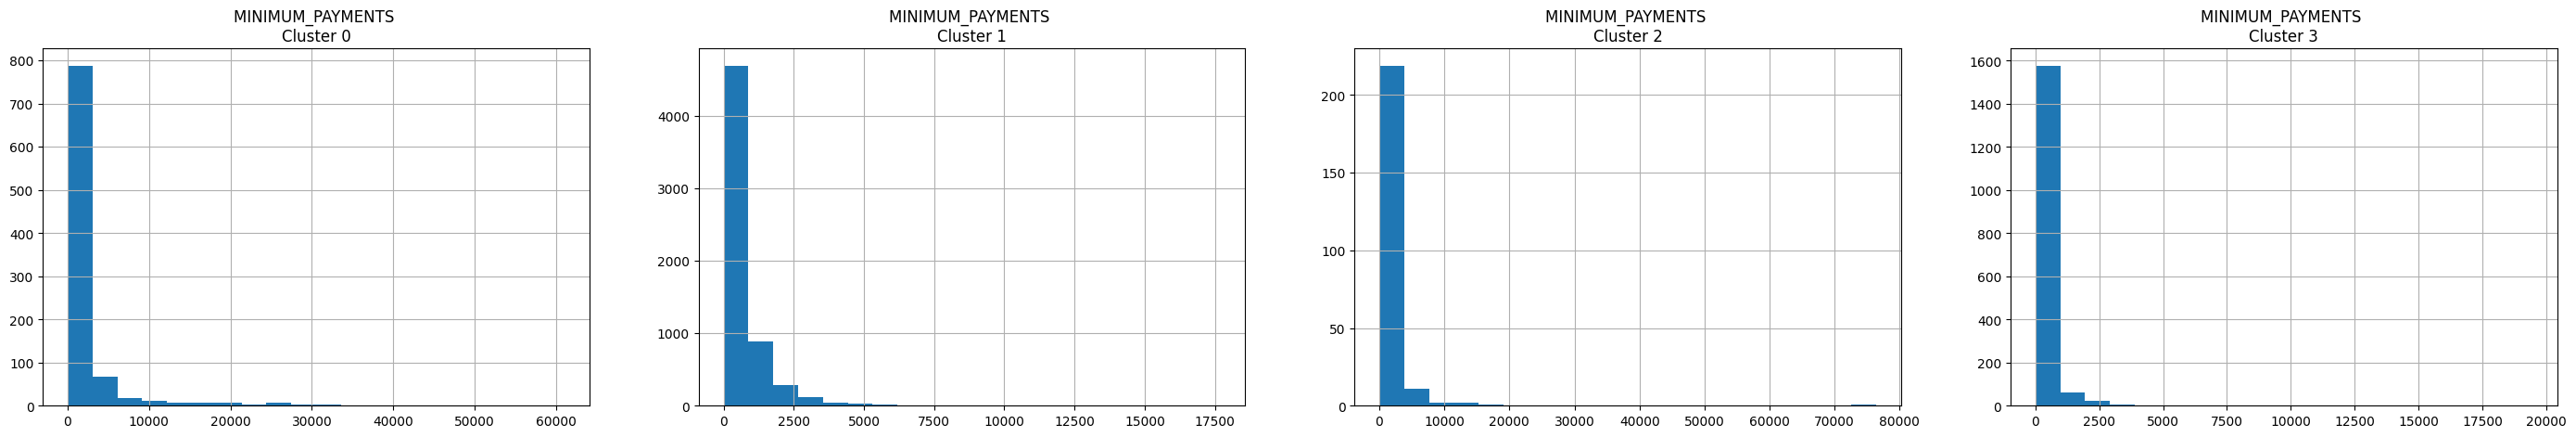

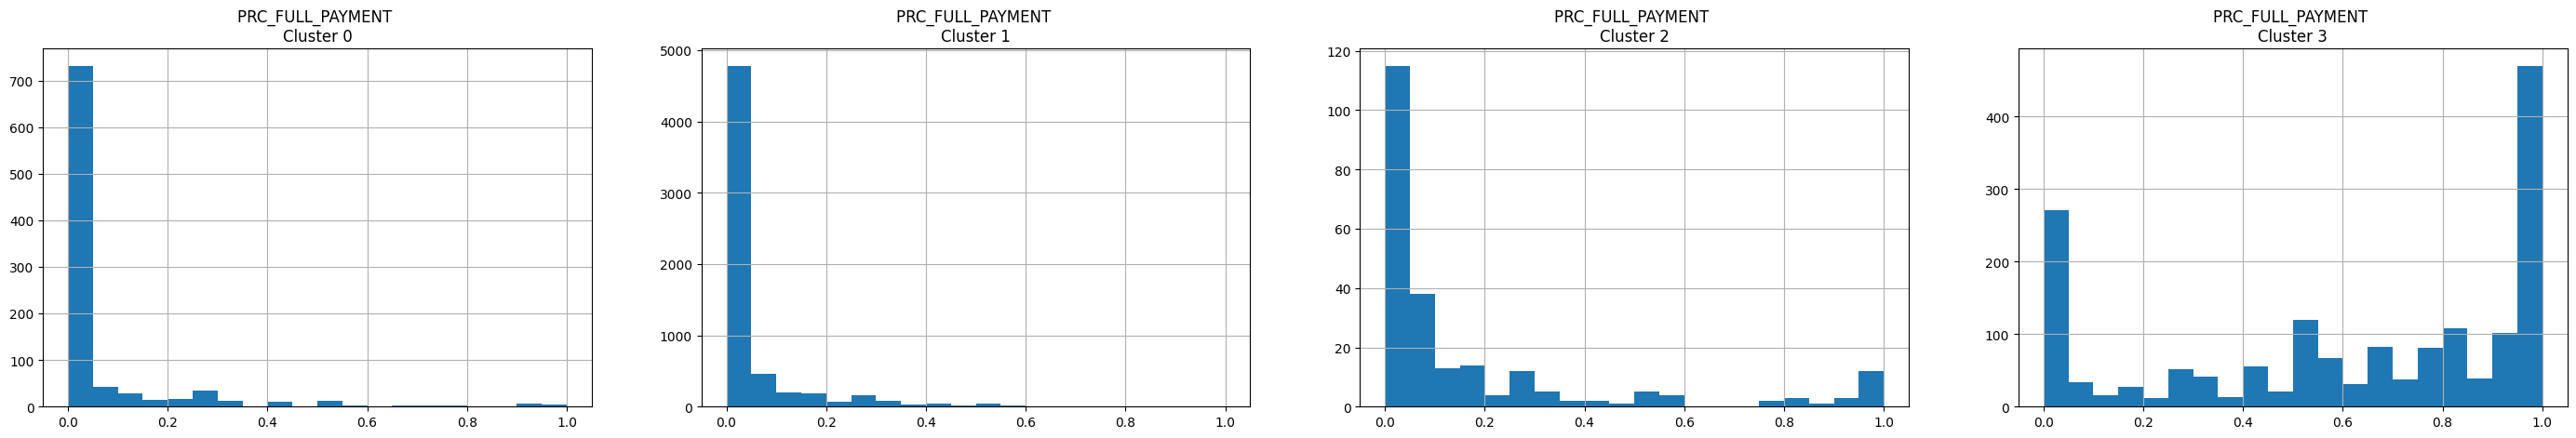

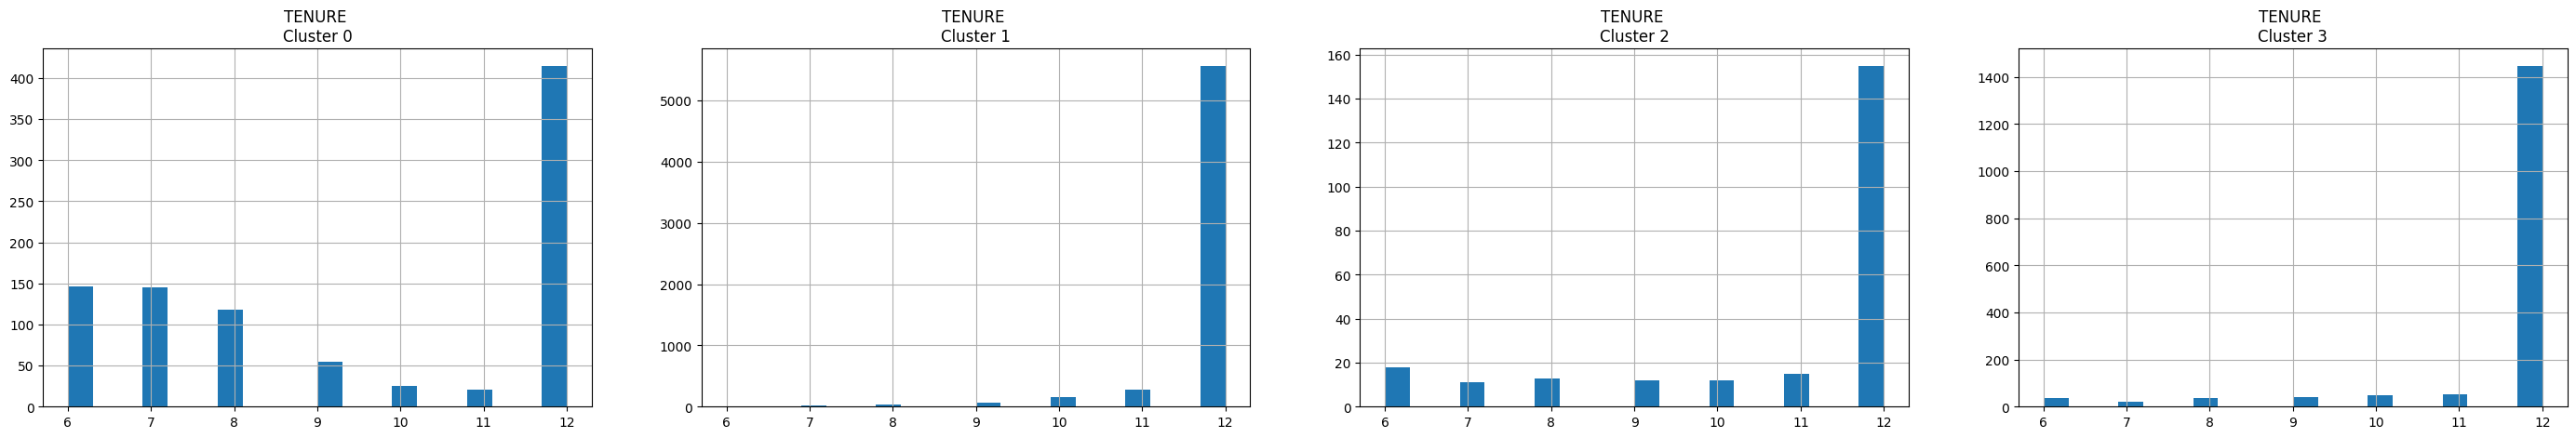

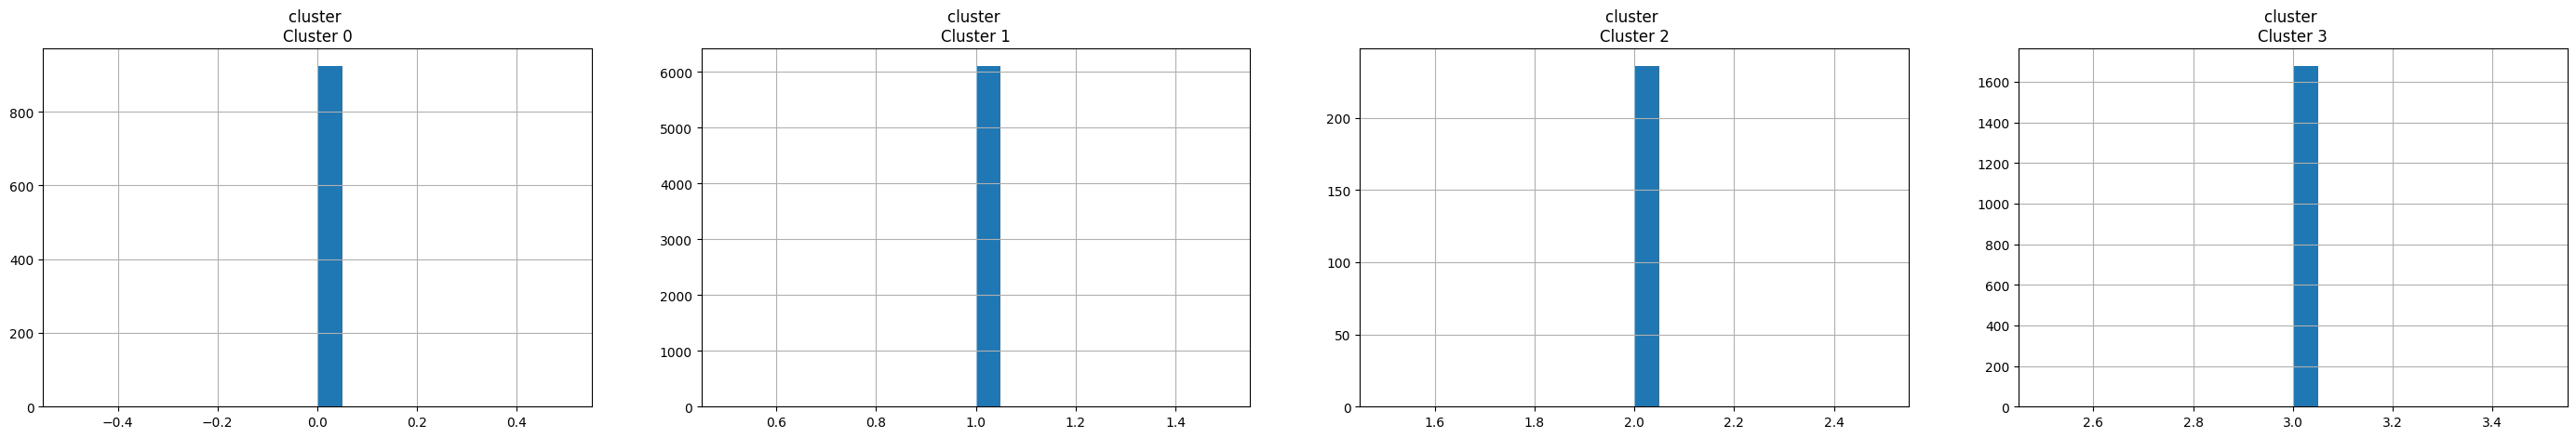

In [43]:
# Plot the histogram of various clusters
for i in df_cluster_dr.columns:
    plt.figure(figsize=(35, 5))

    for j in range(4):
        plt.subplot(1, 4, j + 1)
        cluster = df_cluster_dr[df_cluster_dr["cluster"] == j]
        cluster[i].hist(bins=20)
        plt.title("{} \nCluster {}".format(i, j))

plt.show()

Cluster 0
- Second most dispersed. Second largest cluster.
- Mostly tenure of 12 but includes a lot more at 6.
- Contains largest balance ($175000)

Cluster 1
- Most concentrated population. Largest.
- Has no customers that made full payment.
- Mostly 12 years tenure.

Cluster 2
- Quite sparse and outlying in nature as presented by the PCA. Smallest cluster.
- Will not compare to others as sample size is too small.
- Contains the max amount of purchase.

Cluster 3
- Second most concentrated. Third largest.
- Purchases frequency is high with barely any low frequency behaviour compared to clusters 0, and 1.
- Has higher one off purchase frequency than other two.
- Has a lot more customer that have made their full payment.
- The tenure is old, at mostly just 12 for this group.


In [54]:
pca_df_plot = pca_df.replace(to_replace={0:'More recent customers with low full payment (925)', 
                     1:'General population without full payment (6110)', 
                     2:'Outliers with highest purchase (236)', 
                     3:'Full payment customers with highest one-off-purchase frequency (1679)'
                     })

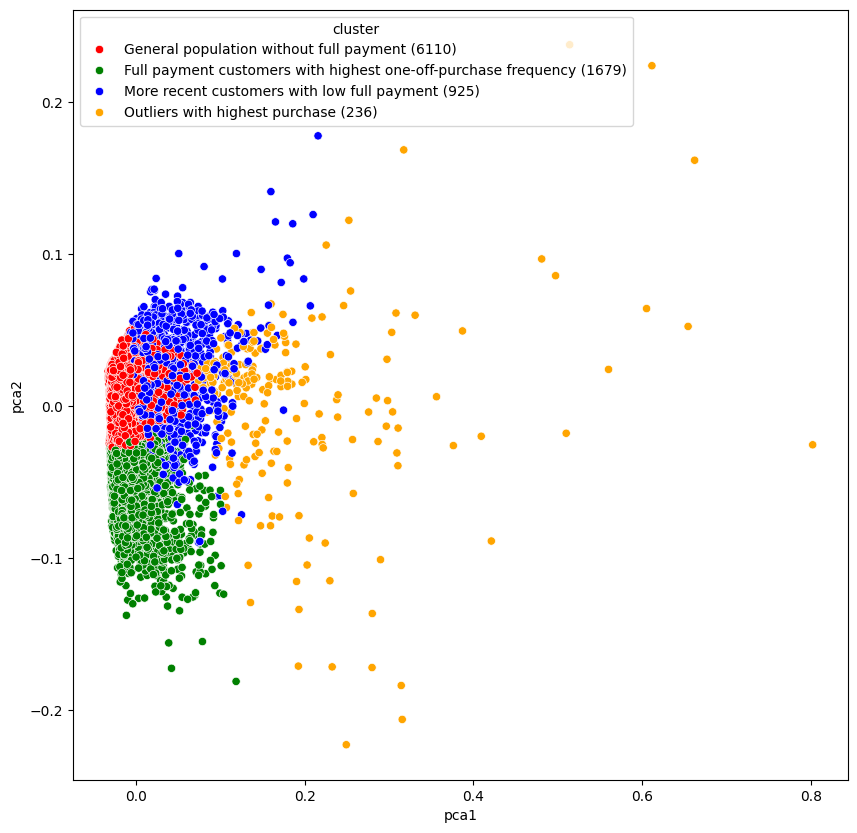

In [56]:



plt.figure(figsize=(10, 10))
ax = sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=pca_df_plot,
    palette=["red", "green", "blue", "orange"],
)
plt.show()